In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

# 2 задание

In [2]:
dataset = pd.read_csv('Сотрудники.csv', delimiter=';')
dataset.dropna(inplace=True)
dataset.rename(columns={'Фамилия': 'Surname', 'Имя': 'Name', 'отдел': 'Department',
                       'стаж_работы': 'Experience', 'оклад': 'Salary'}, inplace=True)

# 3 задание

In [3]:
dataset.head()

,№,Surname,Name,Department,Experience,Salary
0,1.0,Белова,Софья,Маркетинга,6.0,44520.0
1,2.0,Бойцов,Семен,Бухгалтерия,9.0,49050.0
2,3.0,Гайдай,Иван,Маркетинга,22.0,51240.0
3,4.0,Иваненко,Иван,Снабжения,3.0,40000.0
4,5.0,Иванов,Иван,Снабжения,18.0,47200.0


In [4]:
dataset.shape

(30, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   №           30 non-null     float64
 1   Surname     30 non-null     object 
 2   Name        30 non-null     object 
 3   Department  30 non-null     object 
 4   Experience  30 non-null     float64
 5   Salary      30 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.6+ KB


In [6]:
dataset.describe()

,№,Experience,Salary
count,30.000000,30.000000,30.000000
mean,15.500000,15.666667,49298.000000
std,8.803408,9.382057,5577.436316
min,1.000000,2.000000,40000.000000
25%,8.250000,6.750000,45250.000000
50%,15.500000,18.000000,49560.000000
75%,22.750000,23.750000,51240.000000
max,30.000000,28.000000,61440.000000


# 4 задание

### .bar

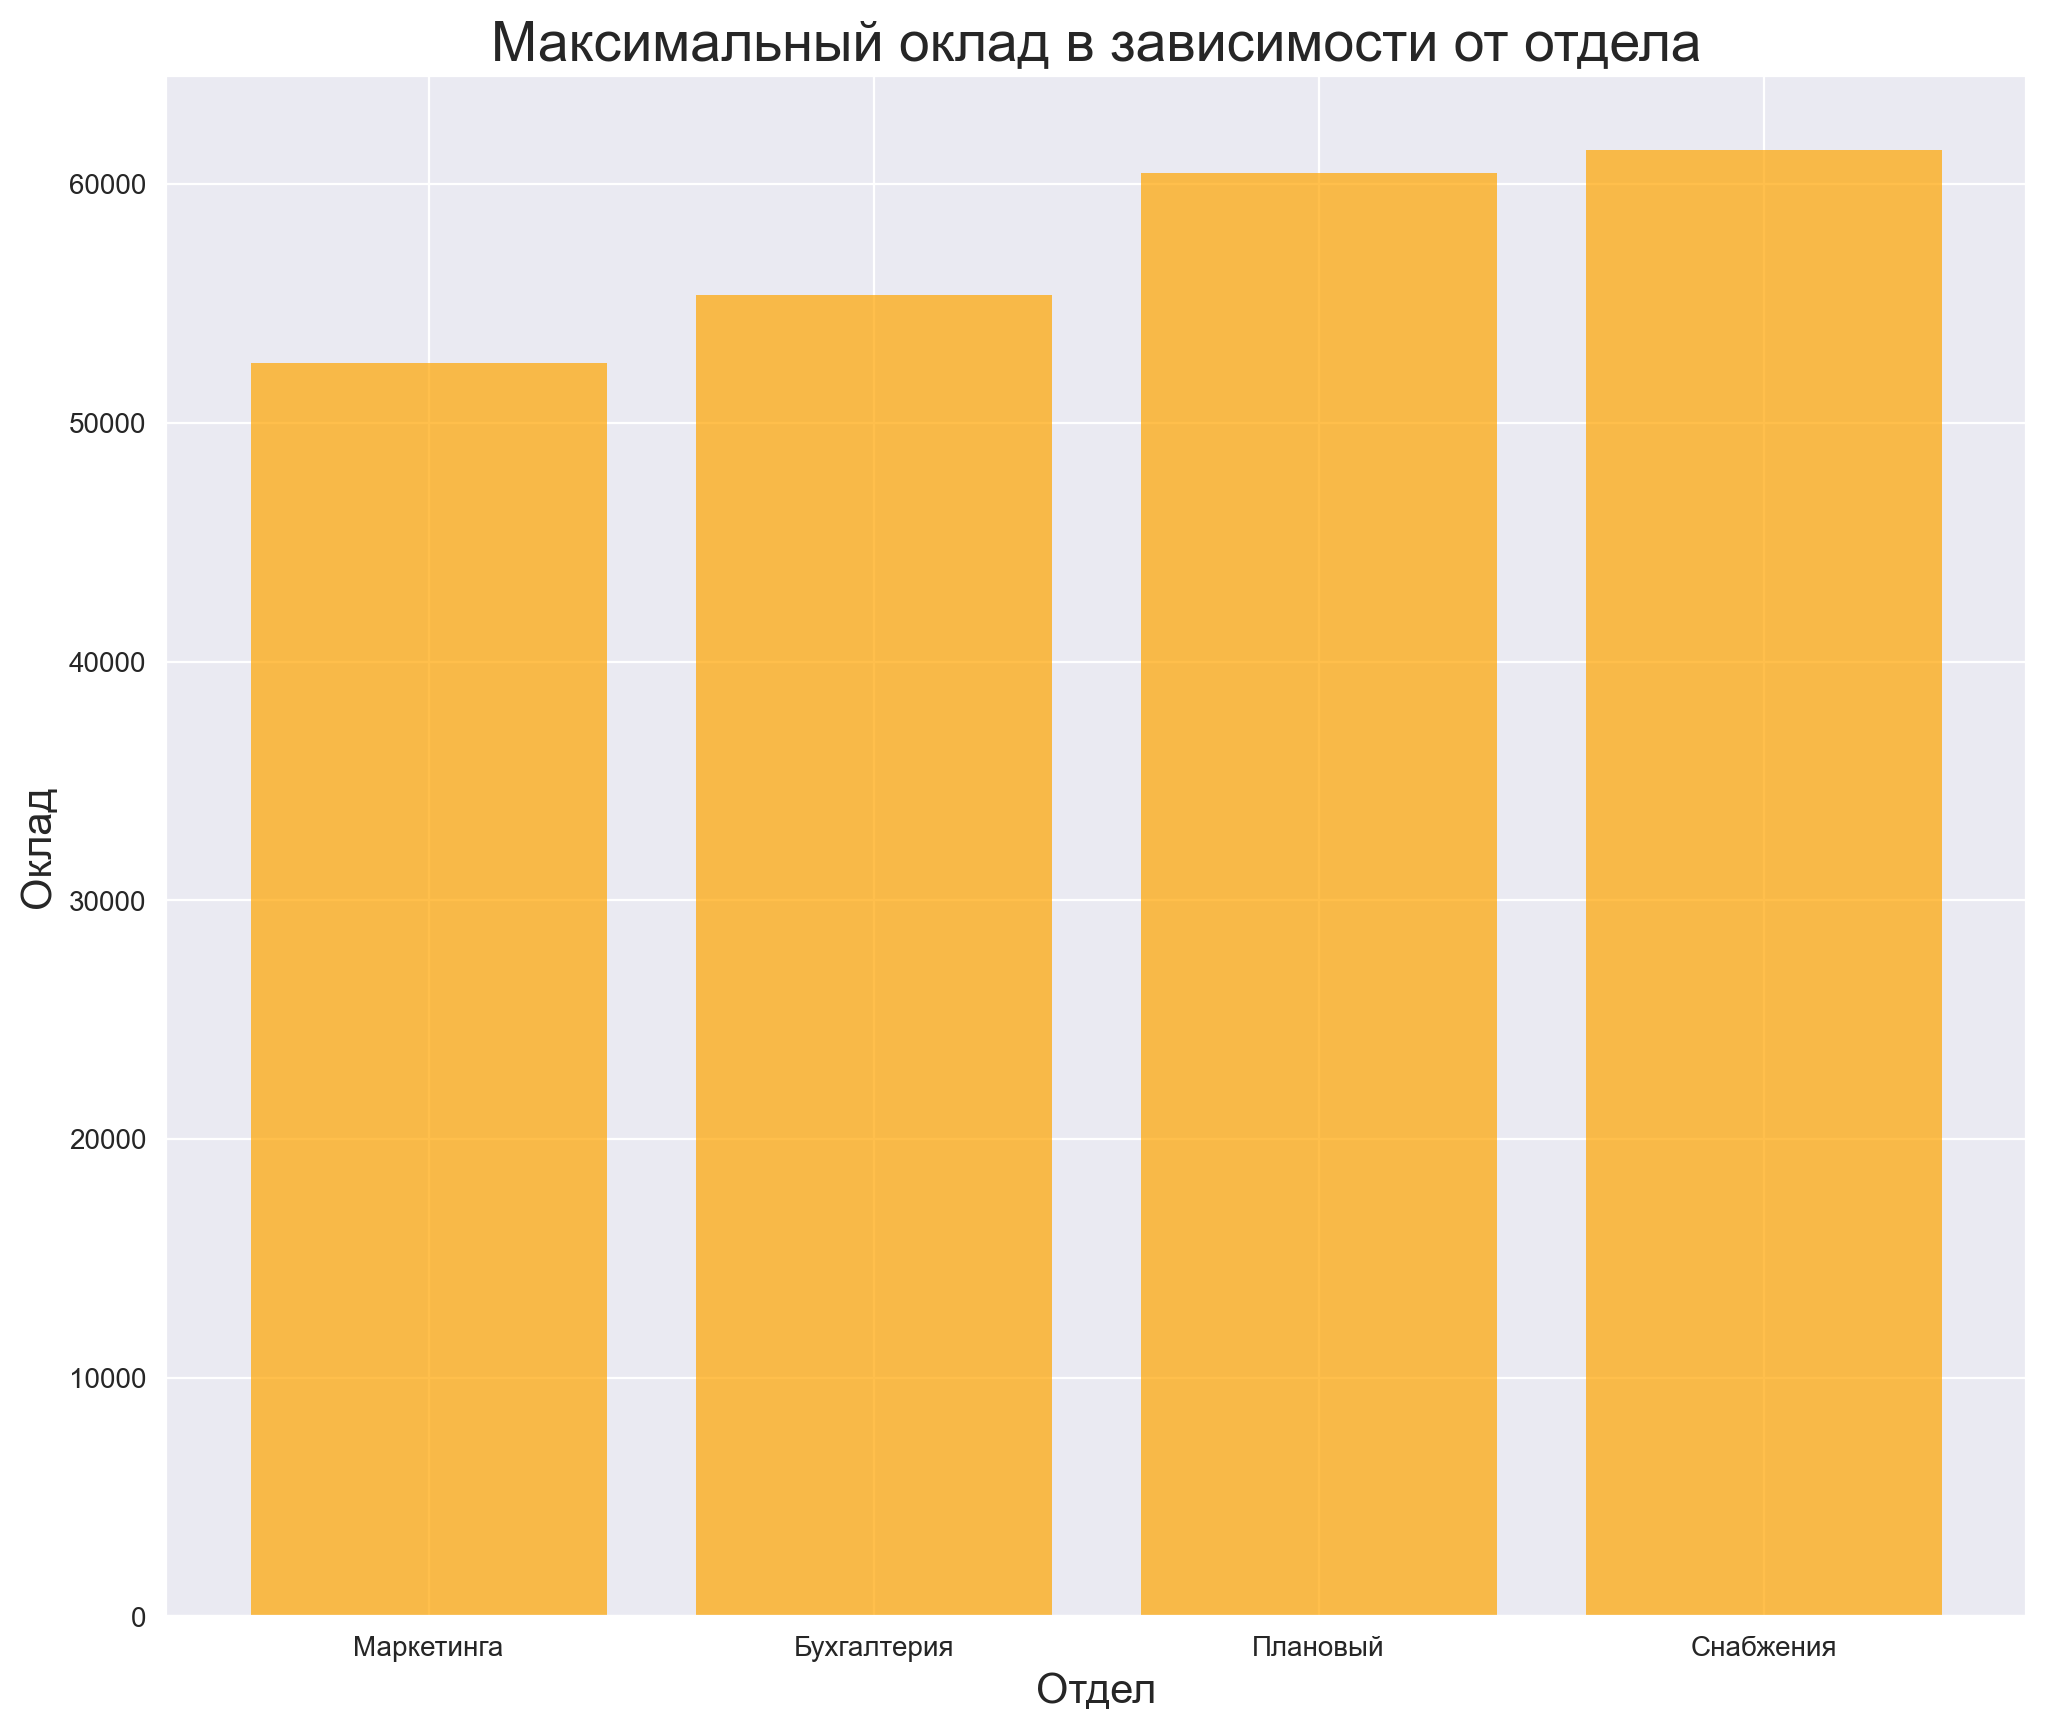

In [7]:
group_dataset = dataset.groupby('Department', as_index=False)['Salary'].max().sort_values(by='Salary')
plt.figure(figsize=(12,10),dpi=200)
plt.bar(x=group_dataset['Department'], height=group_dataset['Salary'], color='orange', 
        linewidth=0, alpha=0.7)
plt.title('Максимальный оклад в зависимости от отдела', fontsize=20);
plt.xlabel('Отдел', fontsize=15)
plt.ylabel('Оклад', fontsize=15);

**Вопрос: В каком отделе максимальный оклад?** 
<br>
<br>
**Ответ: В снабжении.**

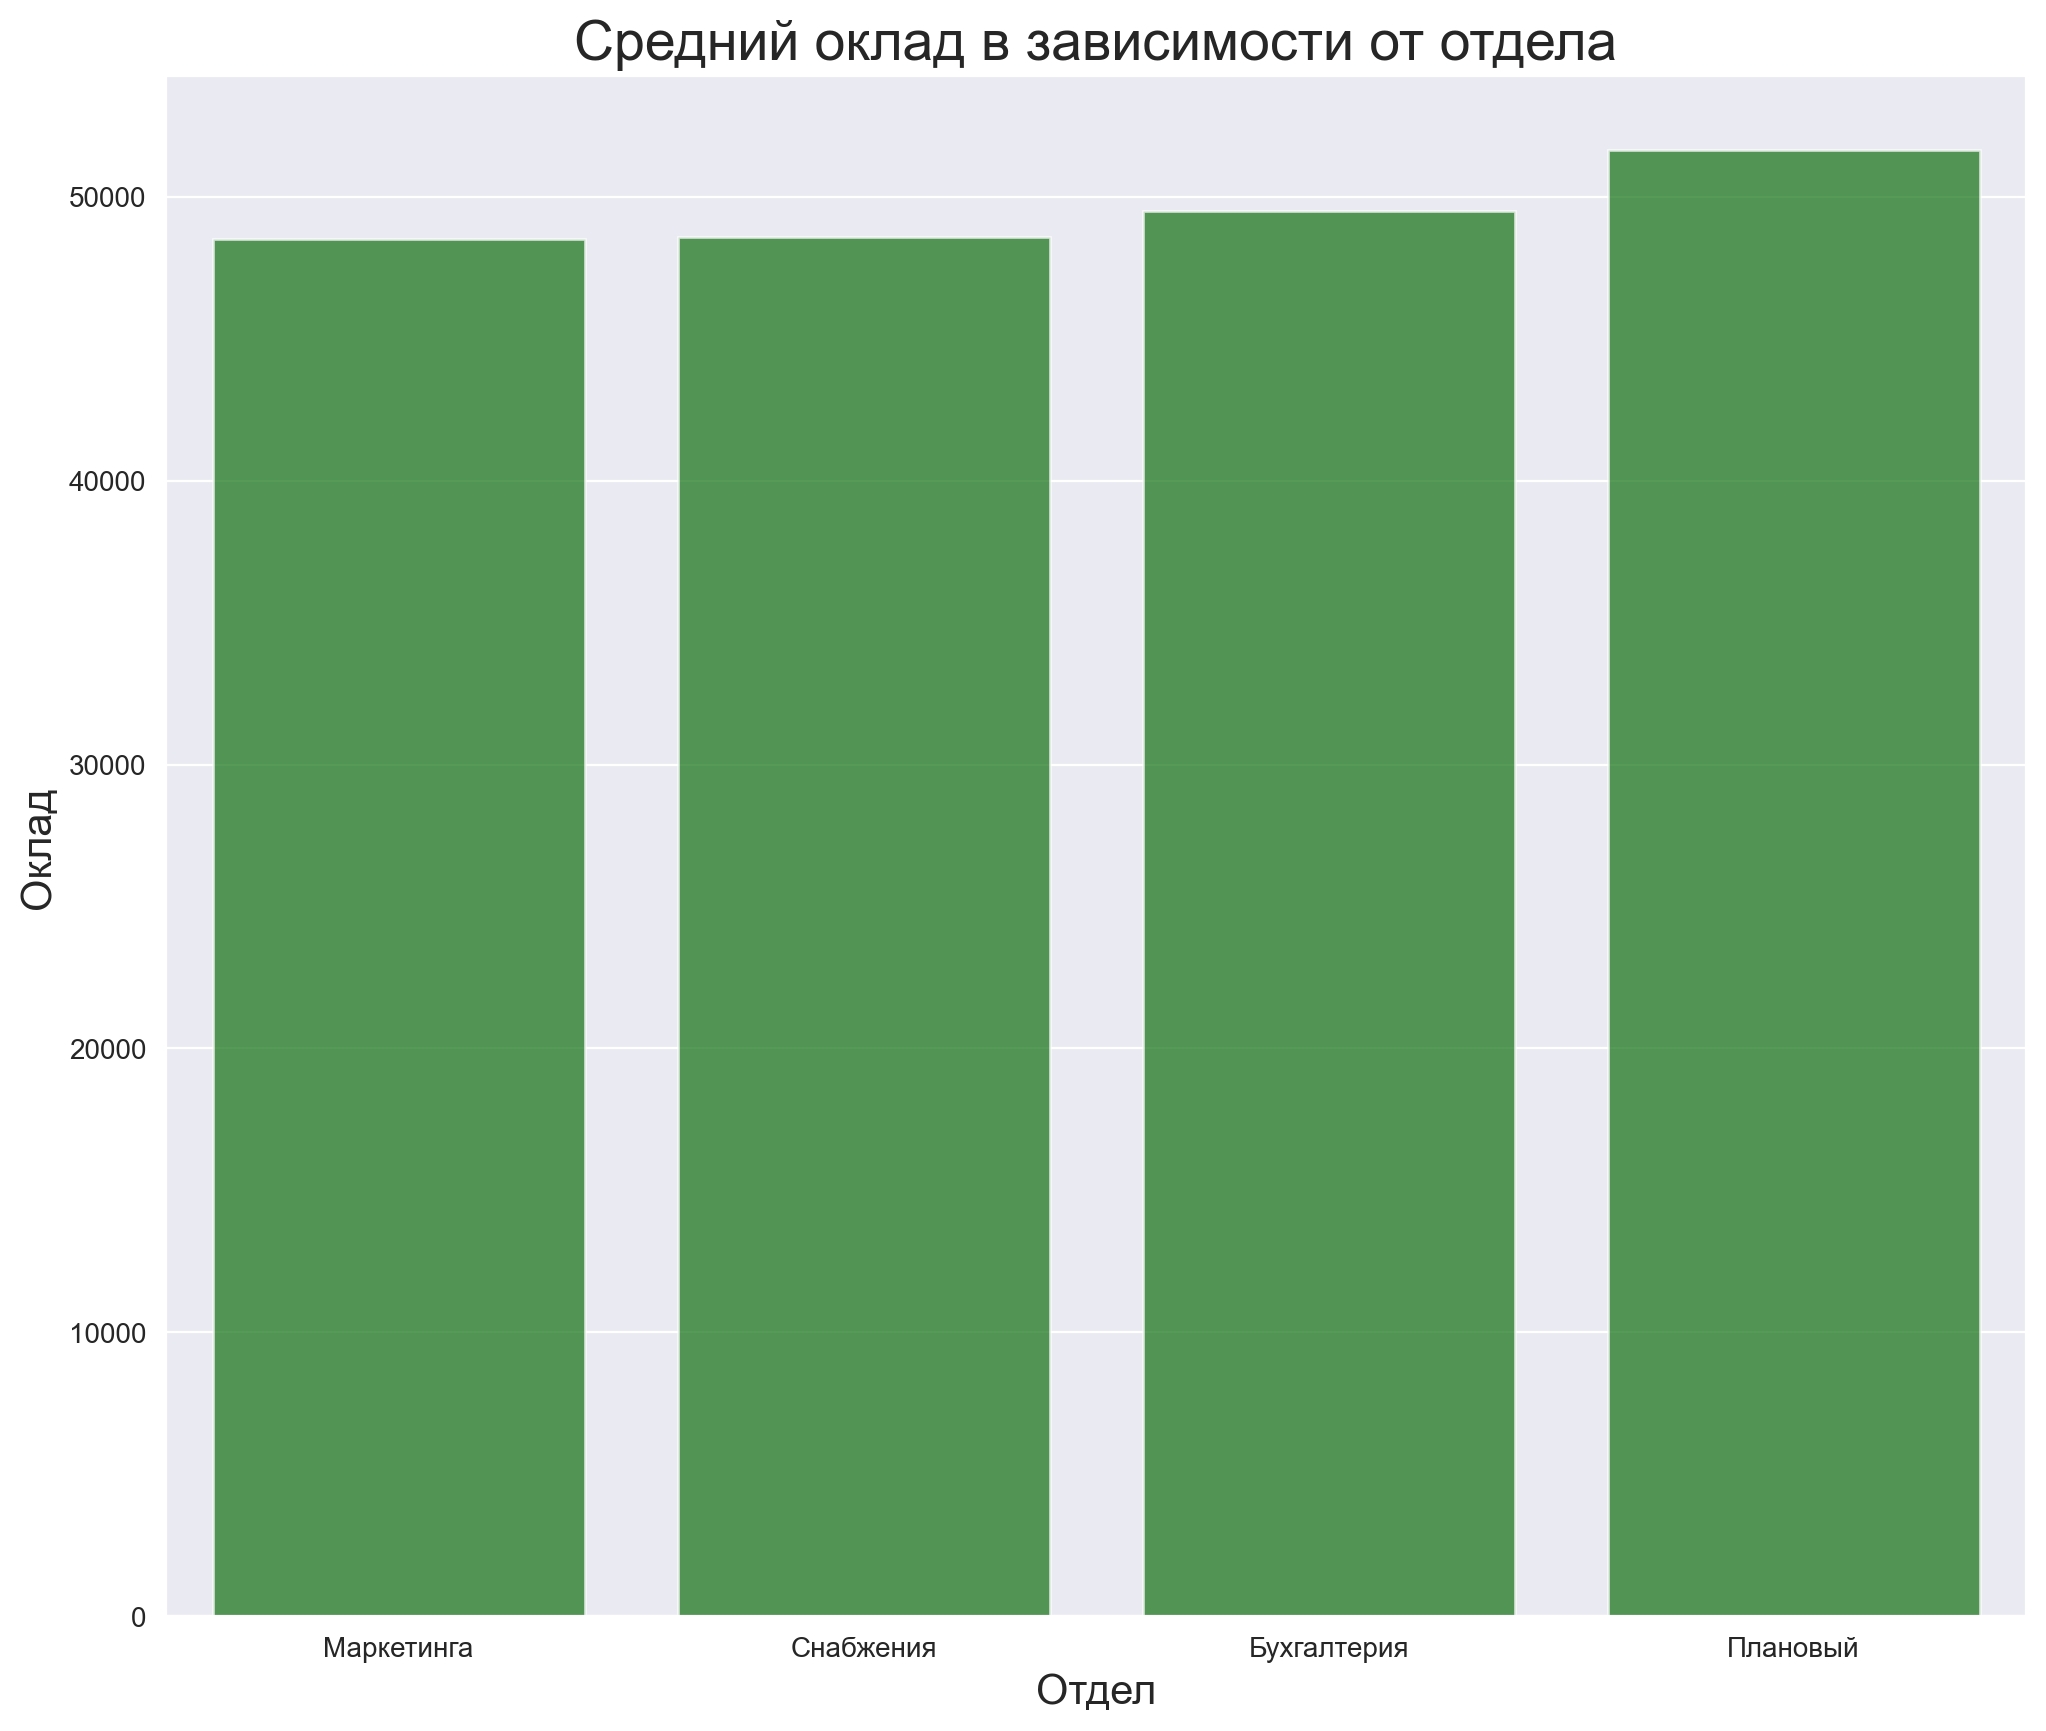

In [8]:
plt.figure(figsize=(12,10),dpi=200)
sns.barplot(x=dataset['Department'], y=dataset['Salary'], color='green', errorbar=None, 
            order=dataset.groupby('Department')['Salary'].mean().sort_values().index, alpha=0.7)
plt.title('Средний оклад в зависимости от отдела', fontsize=20);
plt.xlabel('Отдел', fontsize=15)
plt.ylabel('Оклад', fontsize=15);

**Вопрос: В каком отделе максимальный средний оклад?** 
<br>
<br>
**Ответ: В плановом.**

### .barh

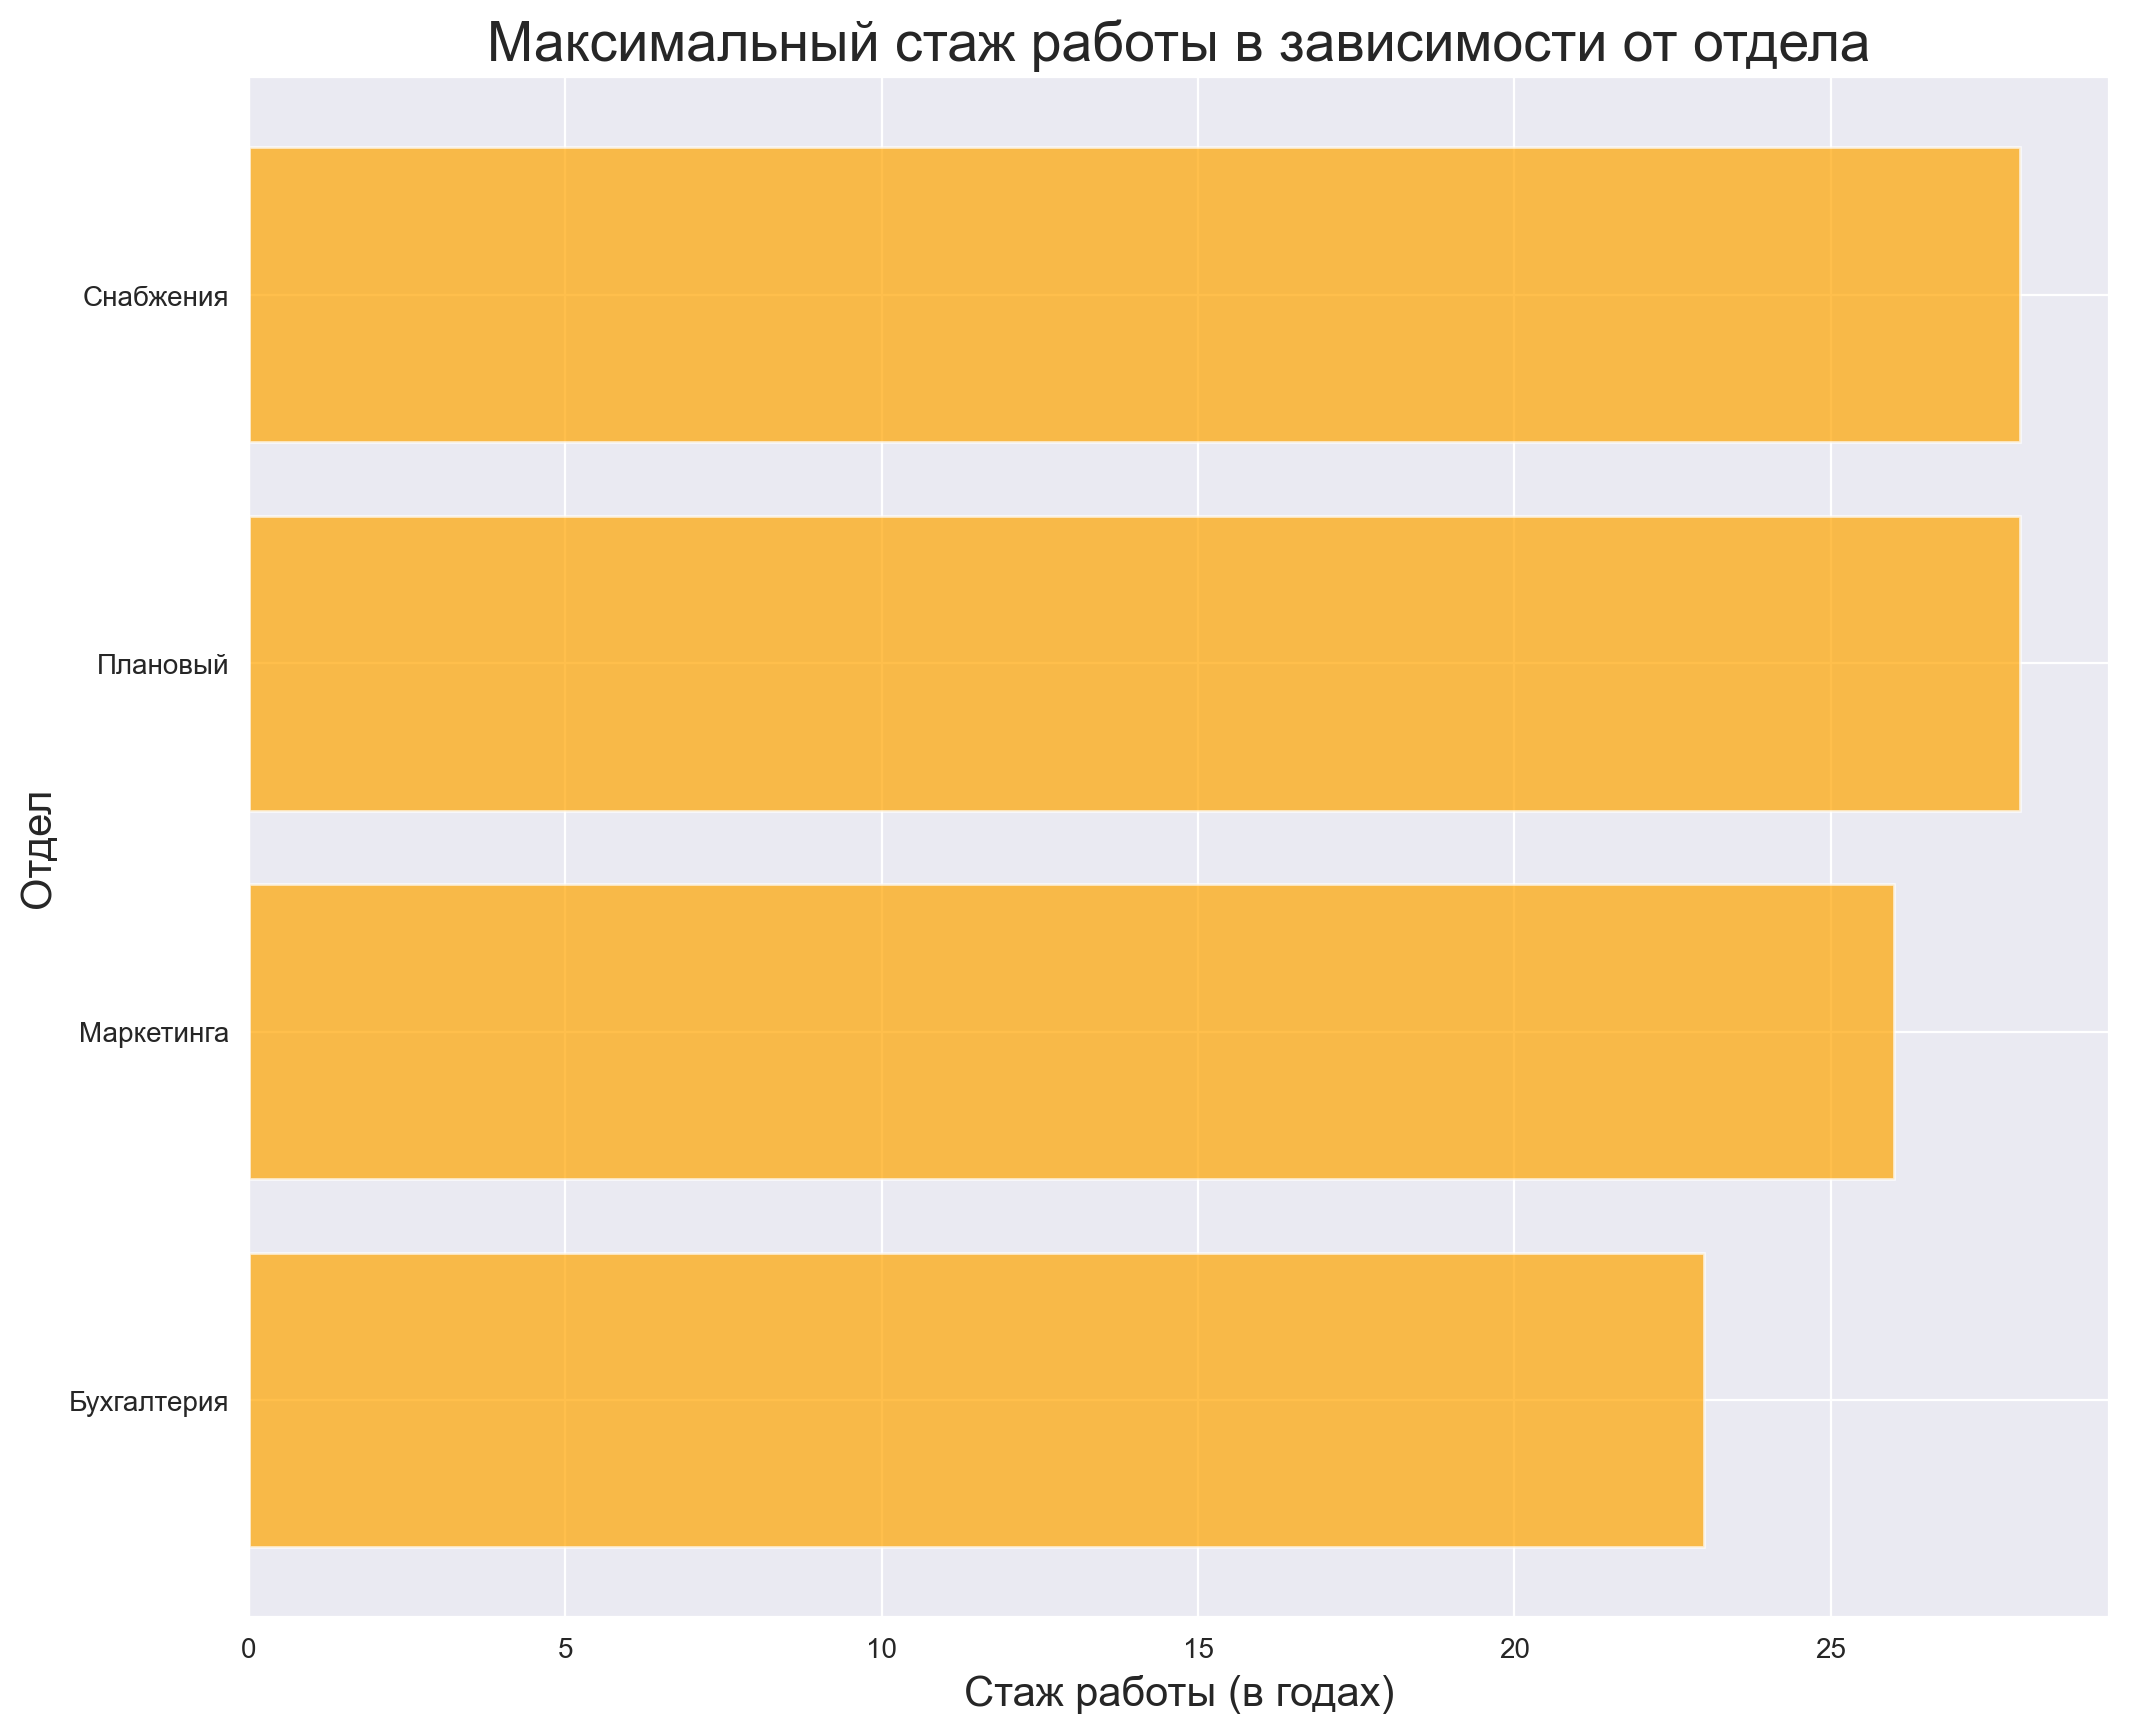

In [9]:
group_dataset = dataset.groupby('Department', 
                                as_index=False)['Experience'].max().sort_values(by='Experience')
plt.figure(figsize=(12,10),dpi=200)
plt.barh(y=group_dataset['Department'], width=group_dataset['Experience'], color='orange', alpha=0.7)
plt.title('Максимальный стаж работы в зависимости от отдела', fontsize=20);
plt.xlabel('Стаж работы (в годах)', fontsize=15)
plt.ylabel('Отдел', fontsize=15);

**Вопрос: В каком отделе максимальный стаж работы?** 
<br>
<br>
**Ответ: В снабжении.**

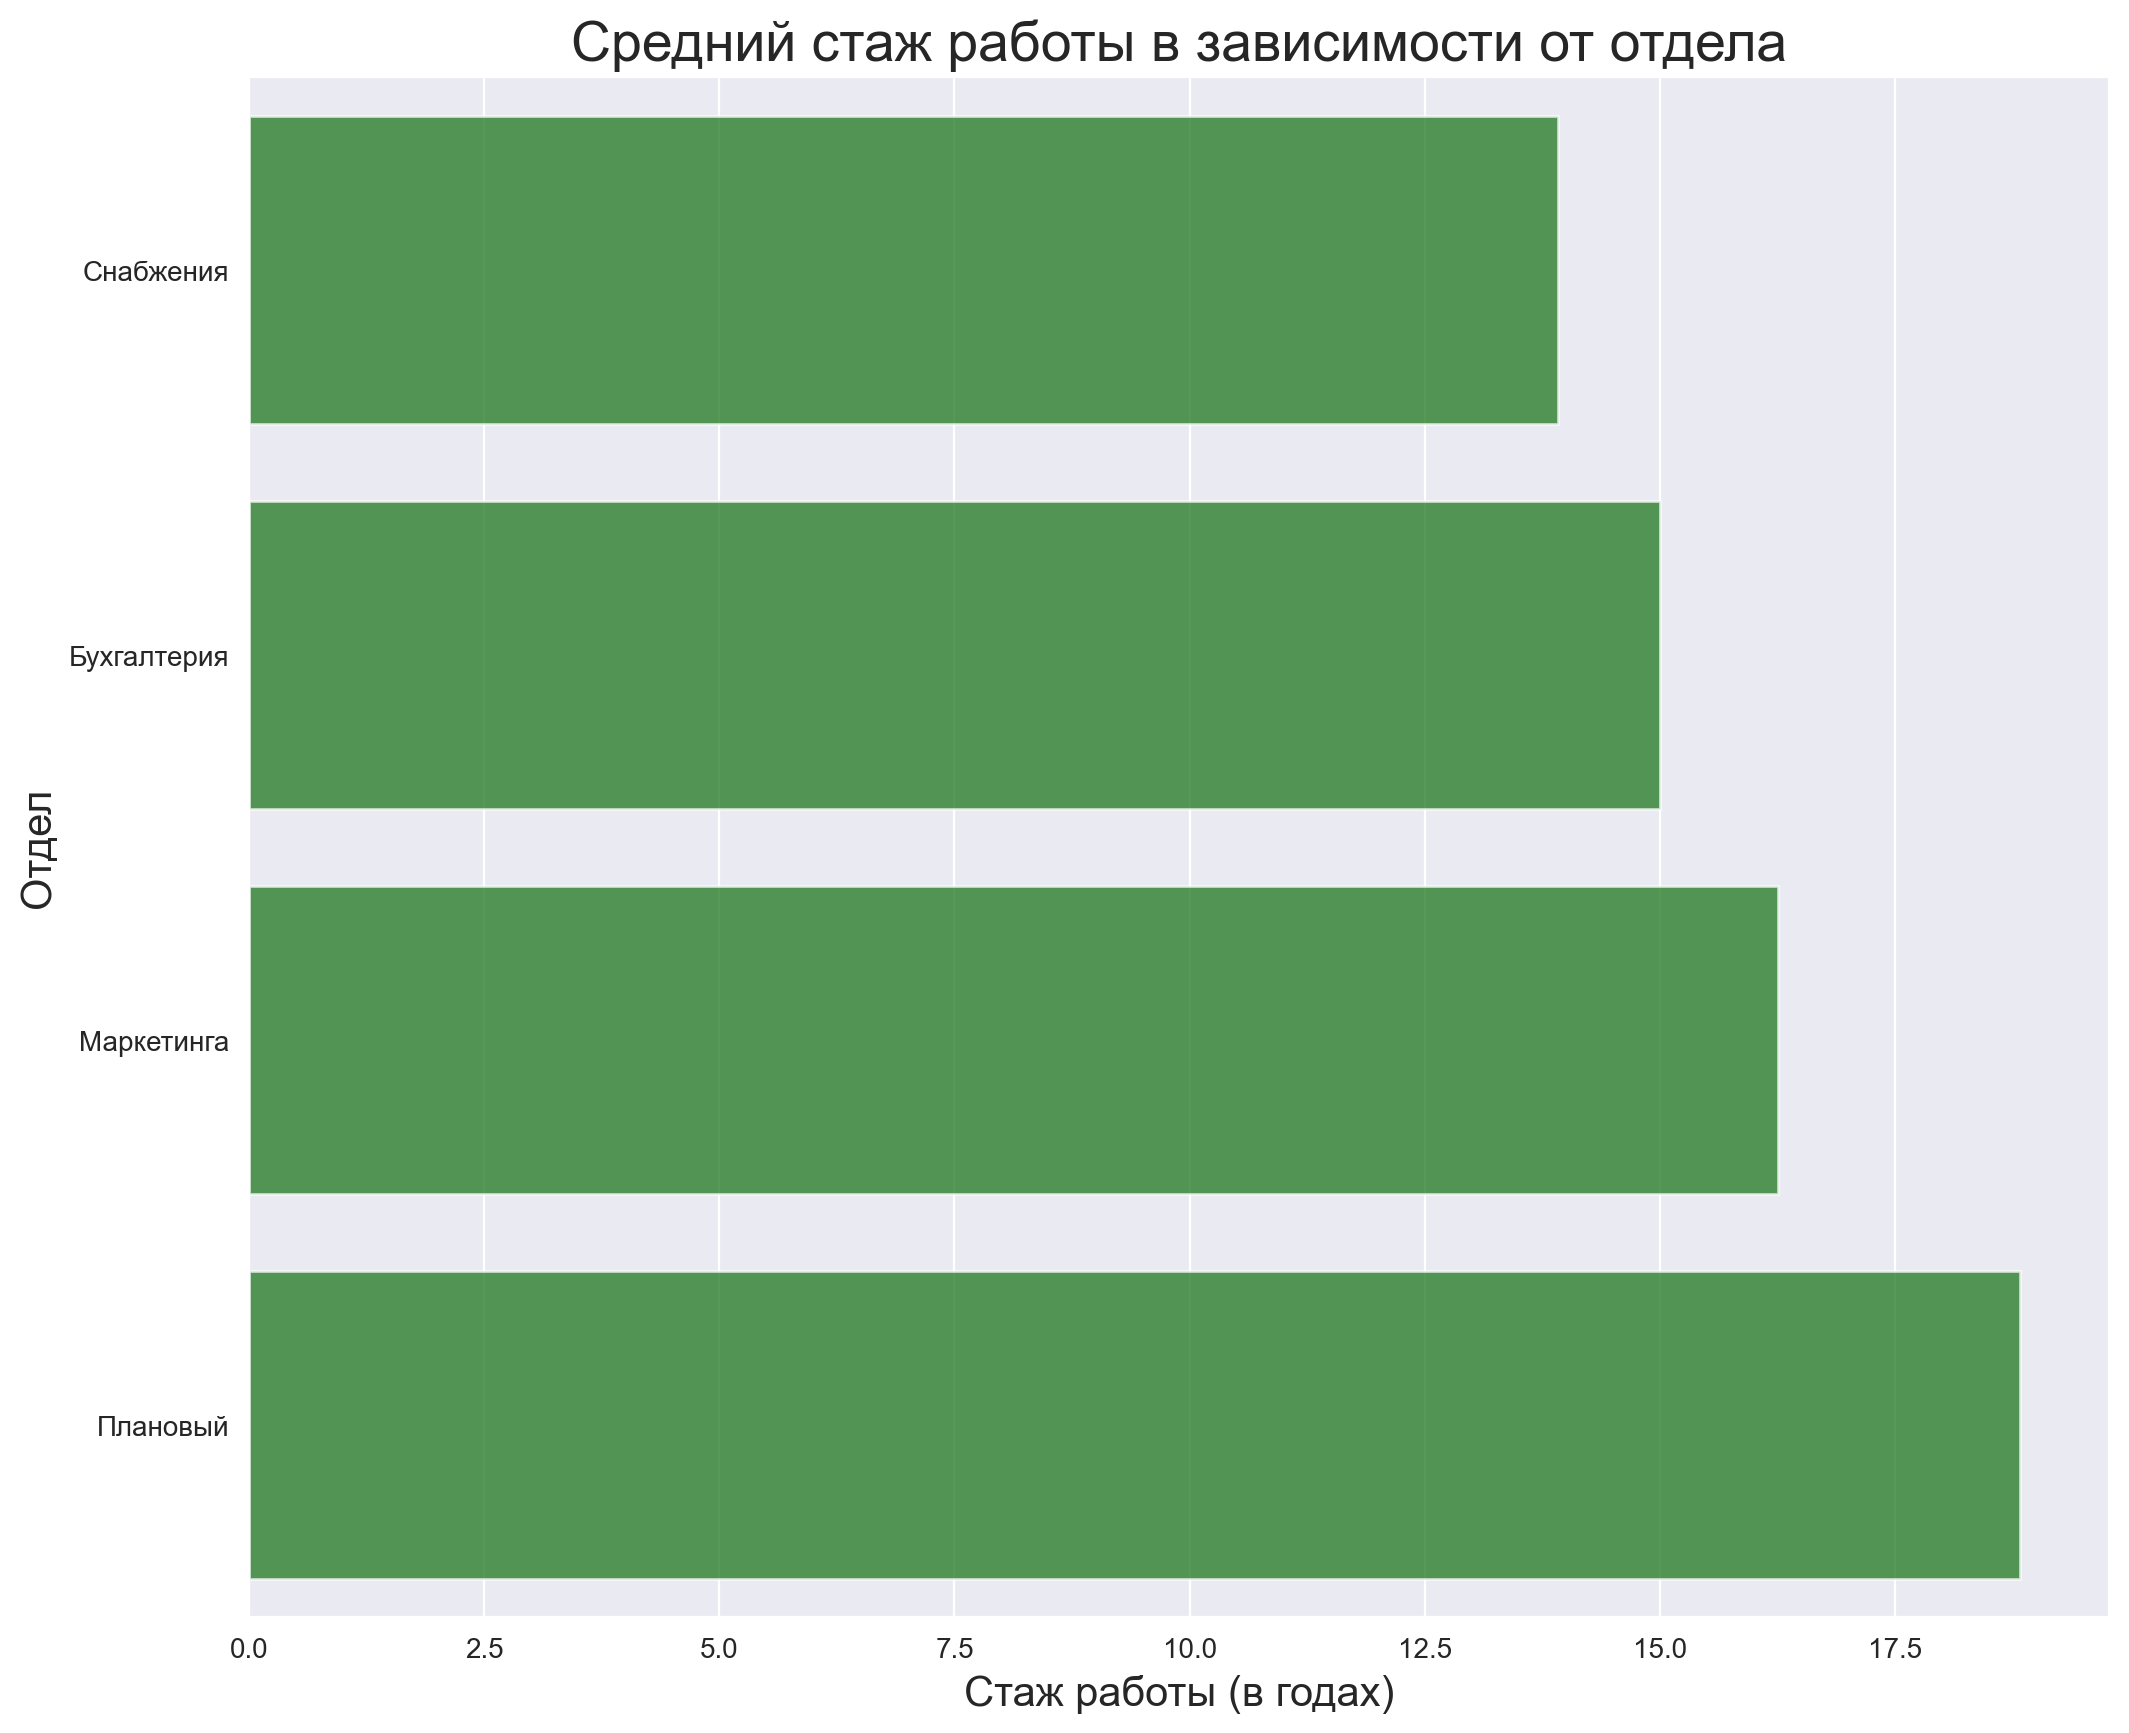

In [10]:
plt.figure(figsize=(12,10),dpi=200)
sns.barplot(x=dataset['Experience'], y=dataset['Department'], color='green', errorbar=None, 
            order=dataset.groupby('Department')['Experience'].mean().sort_values().index,
            orient='h', alpha=0.7)
plt.title('Средний стаж работы в зависимости от отдела', fontsize=20);
plt.xlabel('Стаж работы (в годах)', fontsize=15)
plt.ylabel('Отдел', fontsize=15);

**Вопрос: В каком отделе максимальный средний стаж работы?** 
<br>
<br>
**Ответ: В плановом.**

### .scatter

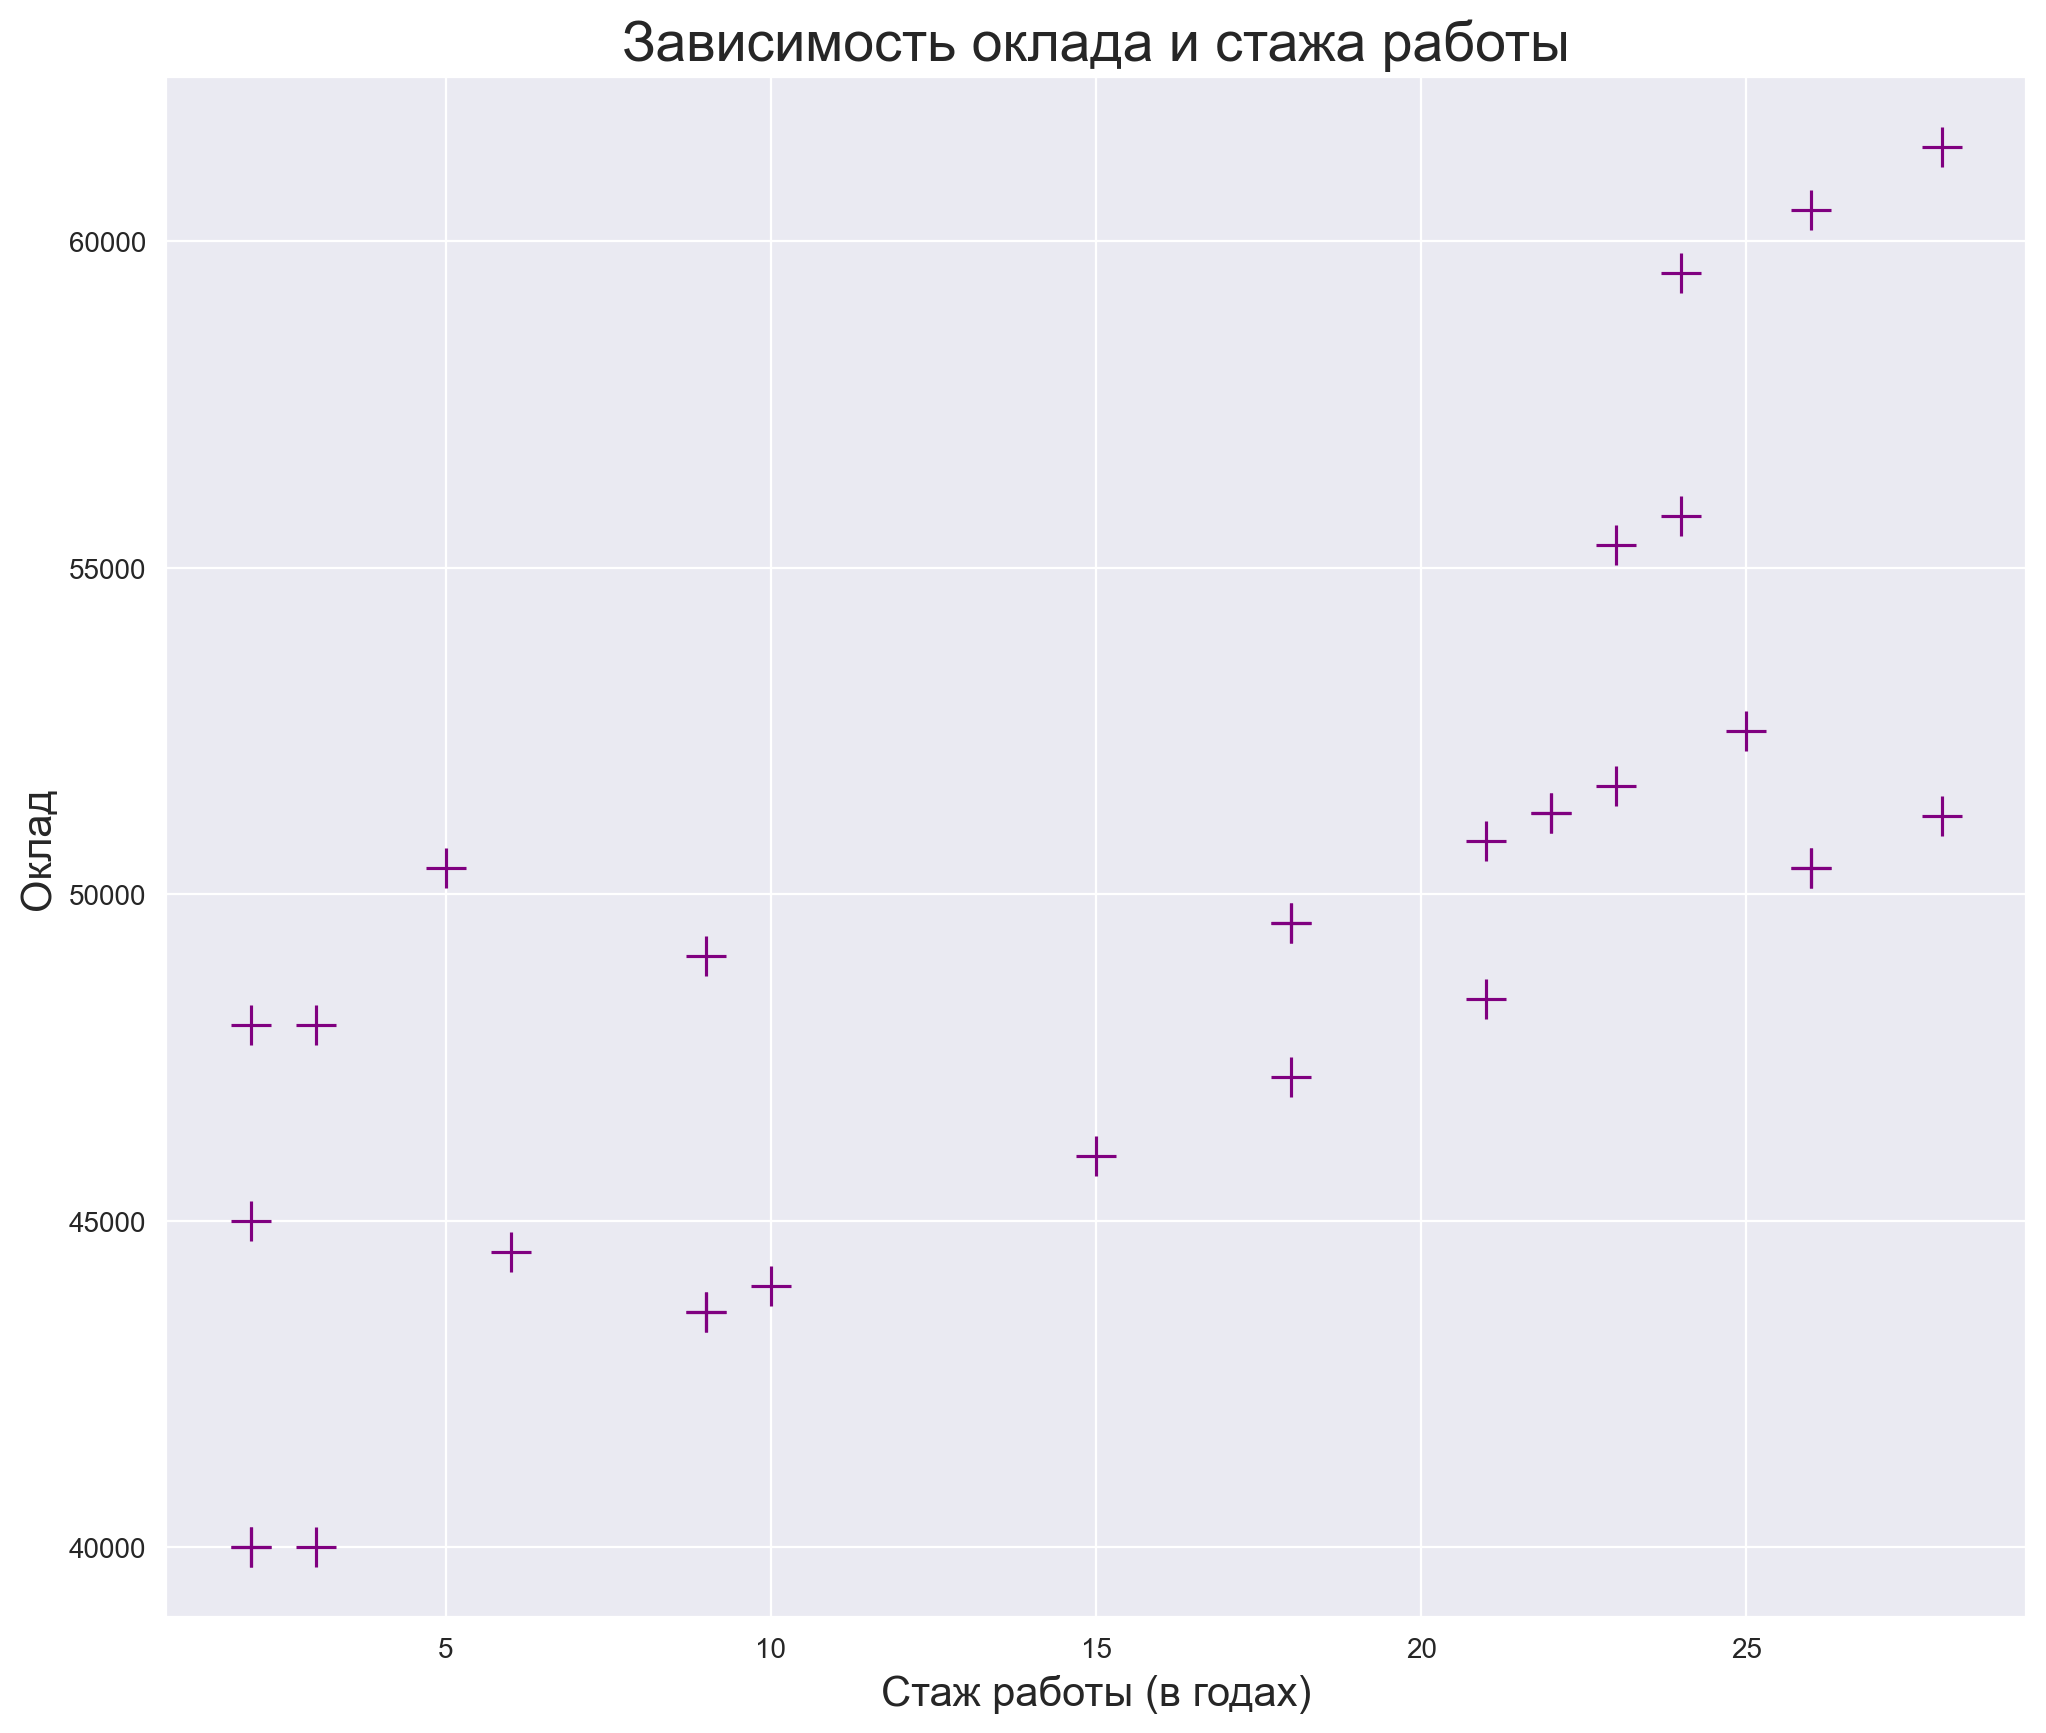

In [11]:
plt.figure(figsize=(12,10),dpi=200)
sns.scatterplot(data=dataset, x='Experience', y='Salary', marker='+', s=200, color='purple');
plt.title('Зависимость оклада и стажа работы', fontsize=20);
plt.xlabel('Стаж работы (в годах)', fontsize=15)
plt.ylabel('Оклад', fontsize=15);

**Вопрос: Как меняется оклад при возрастании стажа работы?** 
<br>
<br>
**Ответ: Из графика видно, что с ростом стажа работника, увеличивается и его оклад.**

### .hist

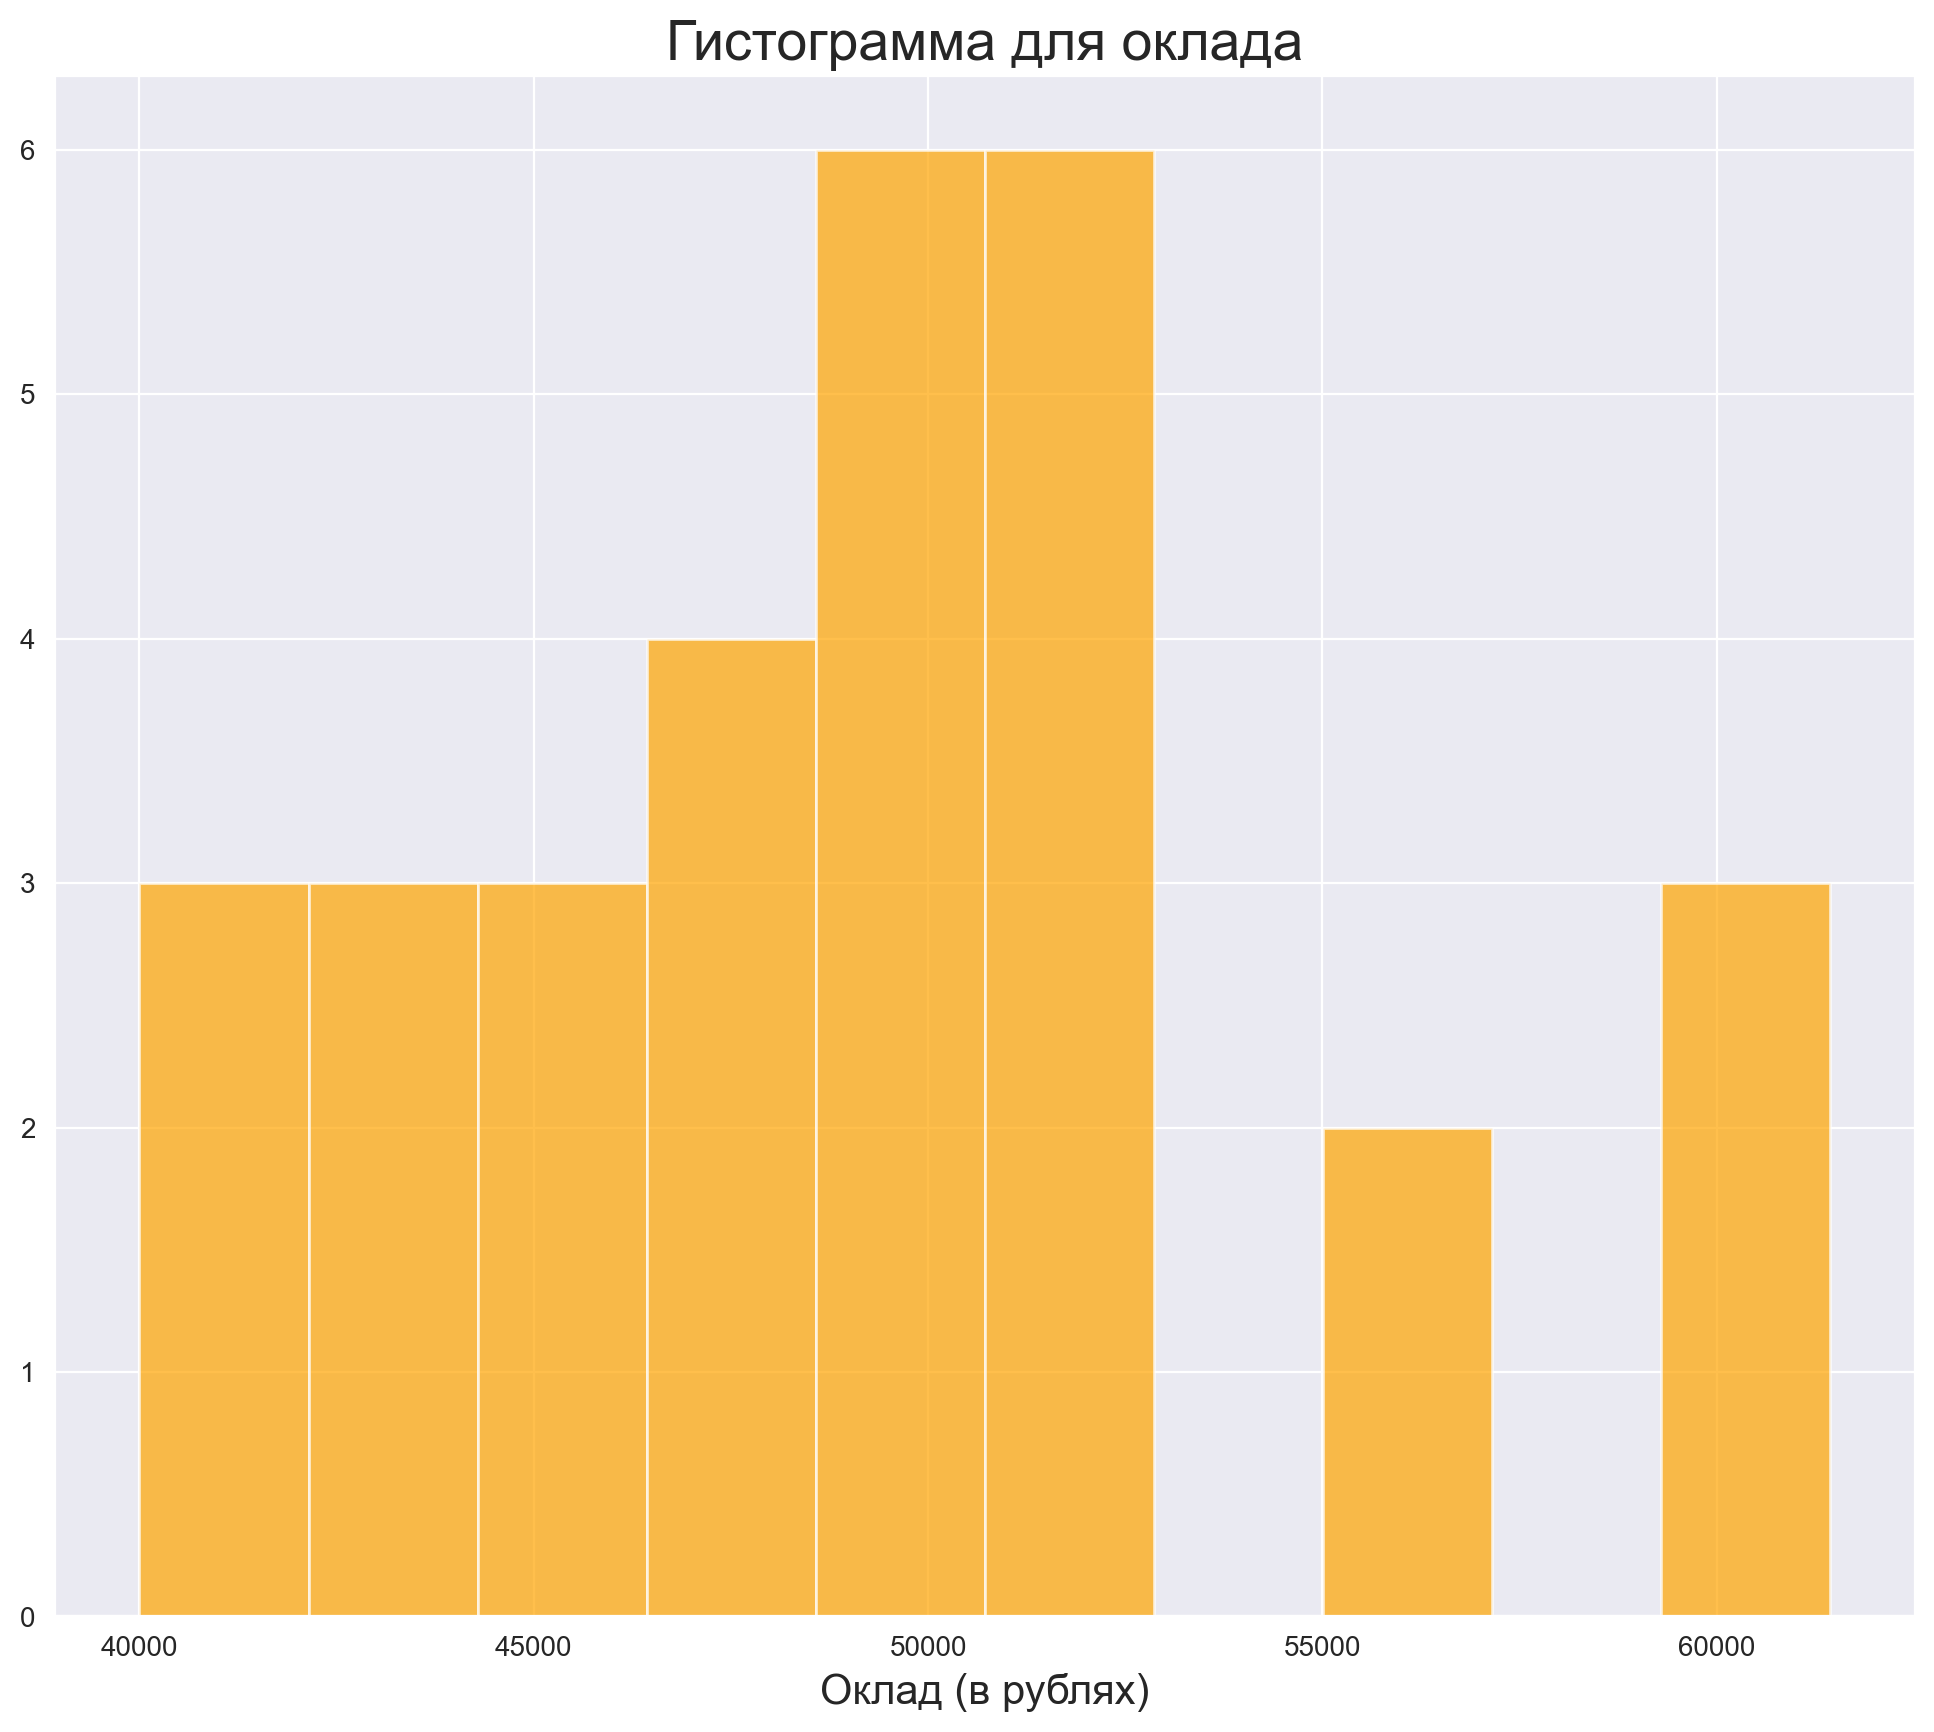

In [12]:
plt.figure(figsize=(12,10),dpi=200)
plt.hist(x=dataset['Salary'], color='orange', alpha=0.7);
plt.title('Гистограмма для оклада', fontsize=20);
plt.xlabel('Оклад (в рублях)', fontsize=15);

**Вопрос: Какой оклад чаще всего встречается у работников?** 
<br>
<br>
**Ответ: Оклад в размере 50000 - 52500 рублей.**
<br>
P.S. Я специально здесь привожу сравнение библиотек matplotlib и seaborn. Без форматирования seaborn работает лучше, ниже это показано, между столбцами нет пропусков.

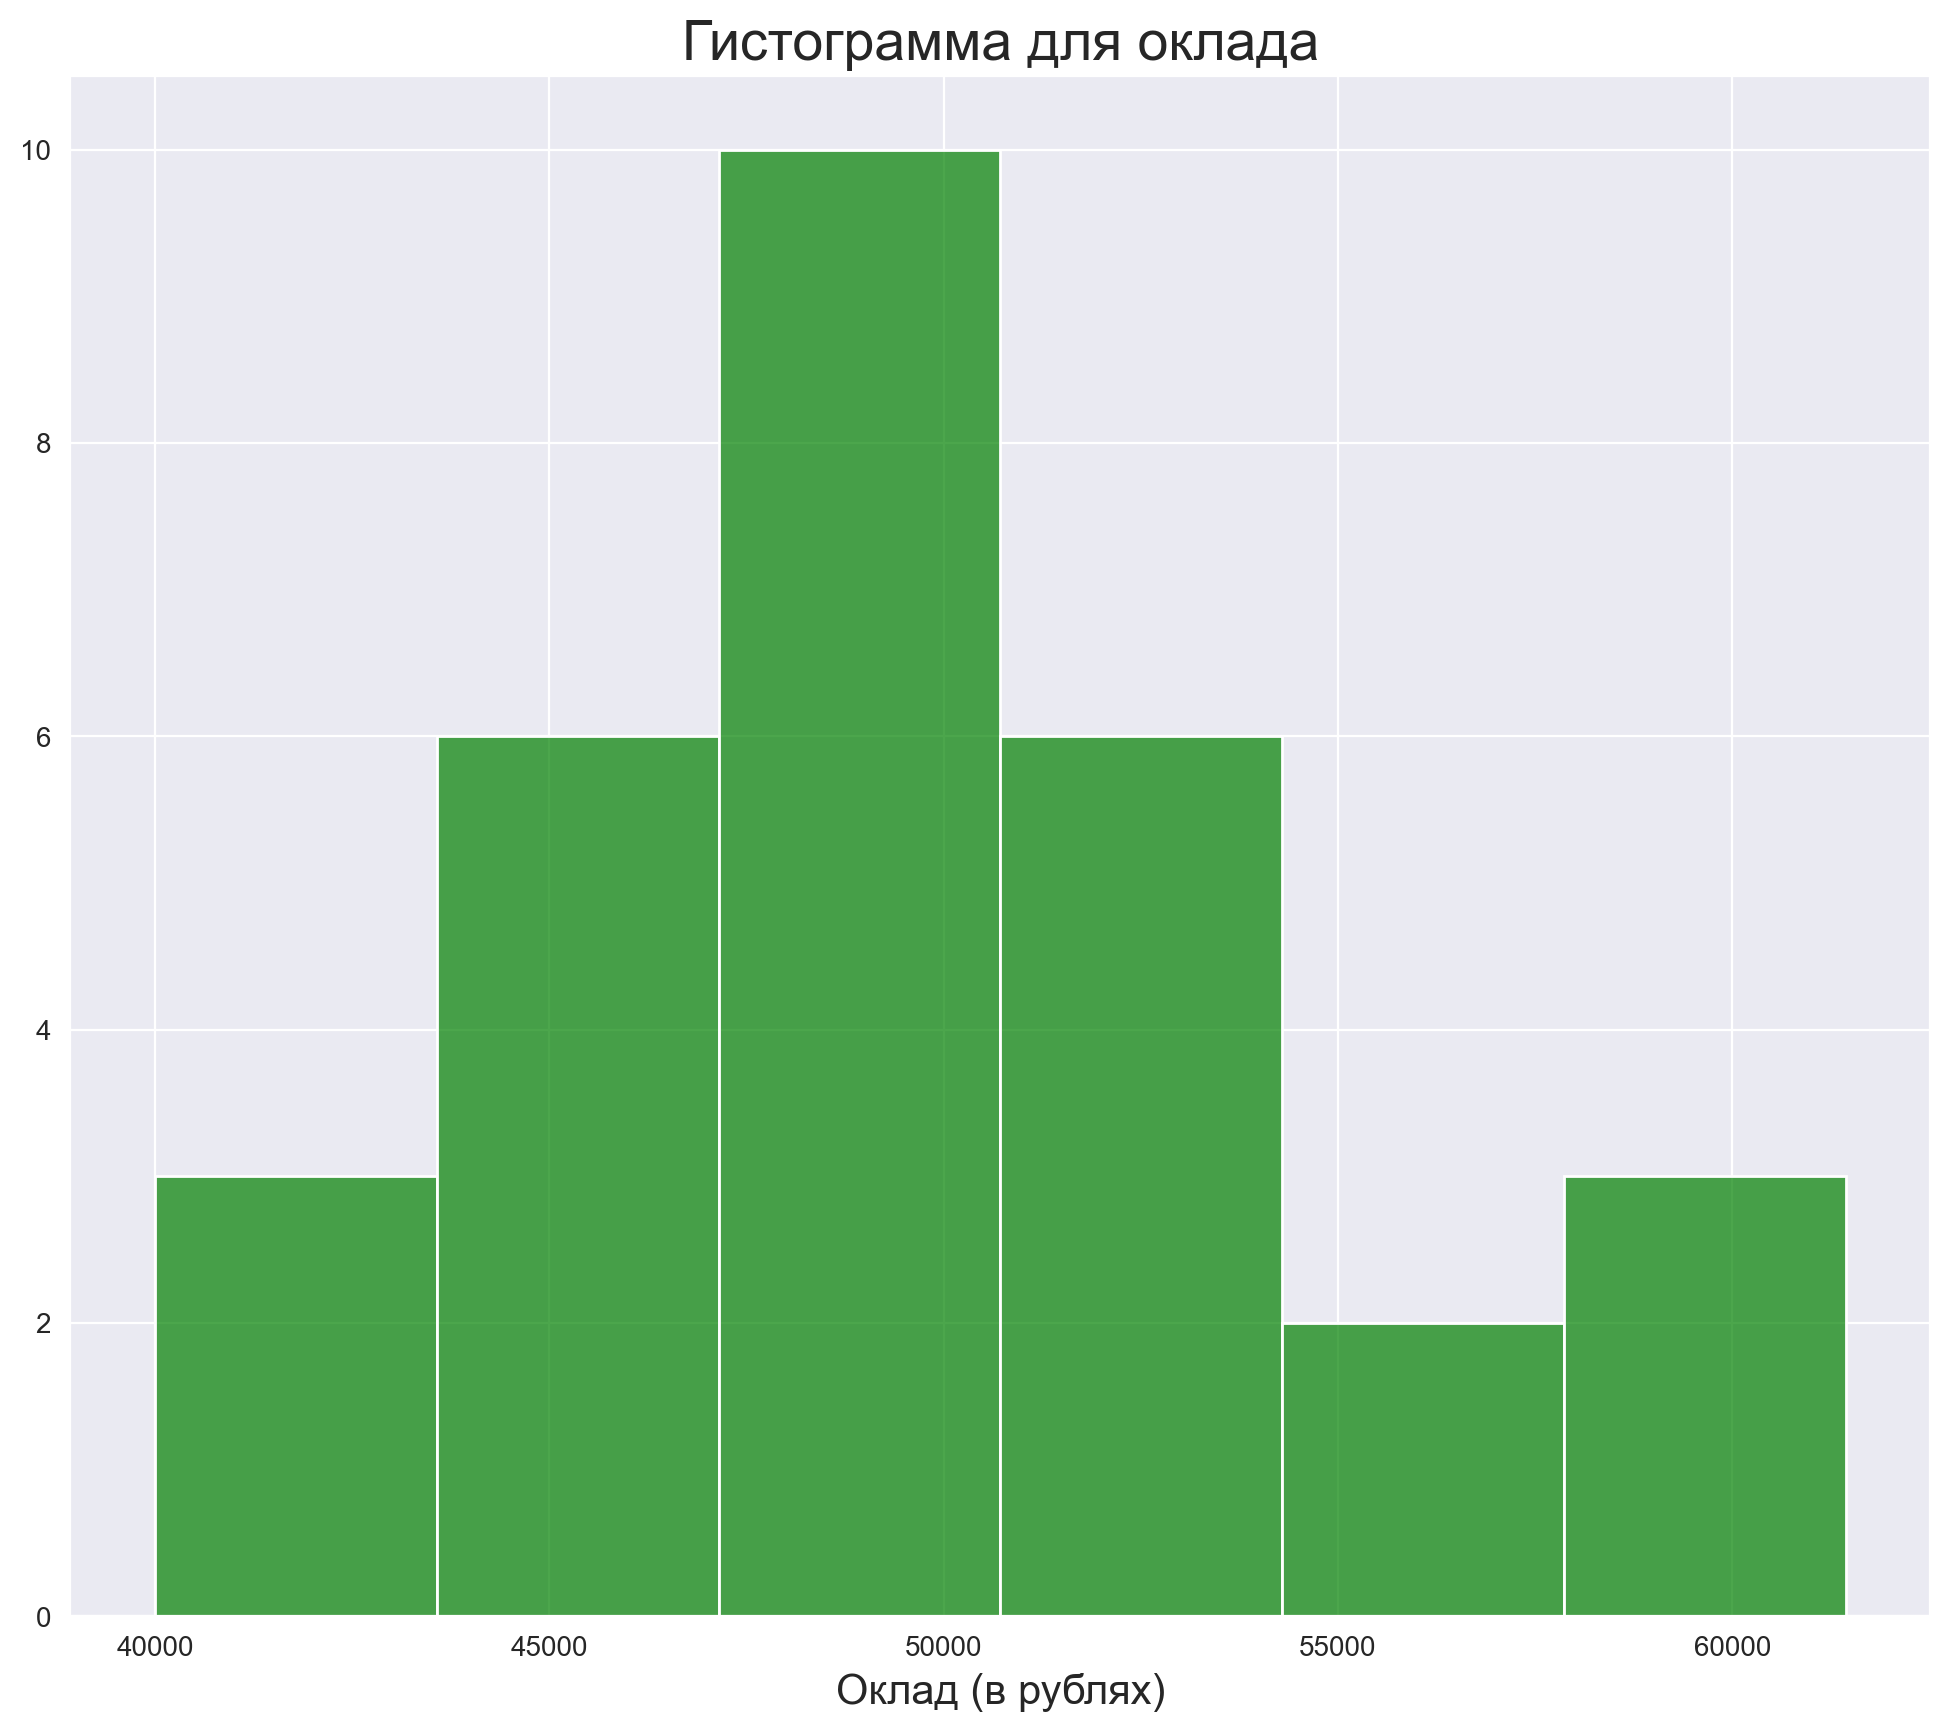

In [13]:
plt.figure(figsize=(12,10),dpi=200)
sns.histplot(data=dataset, x='Salary', color='green', alpha=0.7);
plt.title('Гистограмма для оклада', fontsize=20);
plt.xlabel('Оклад (в рублях)', fontsize=15);
plt.ylabel('');

### .pie

In [14]:
names_count = dataset.groupby('Name', as_index=False).count()[['Name', '№']]

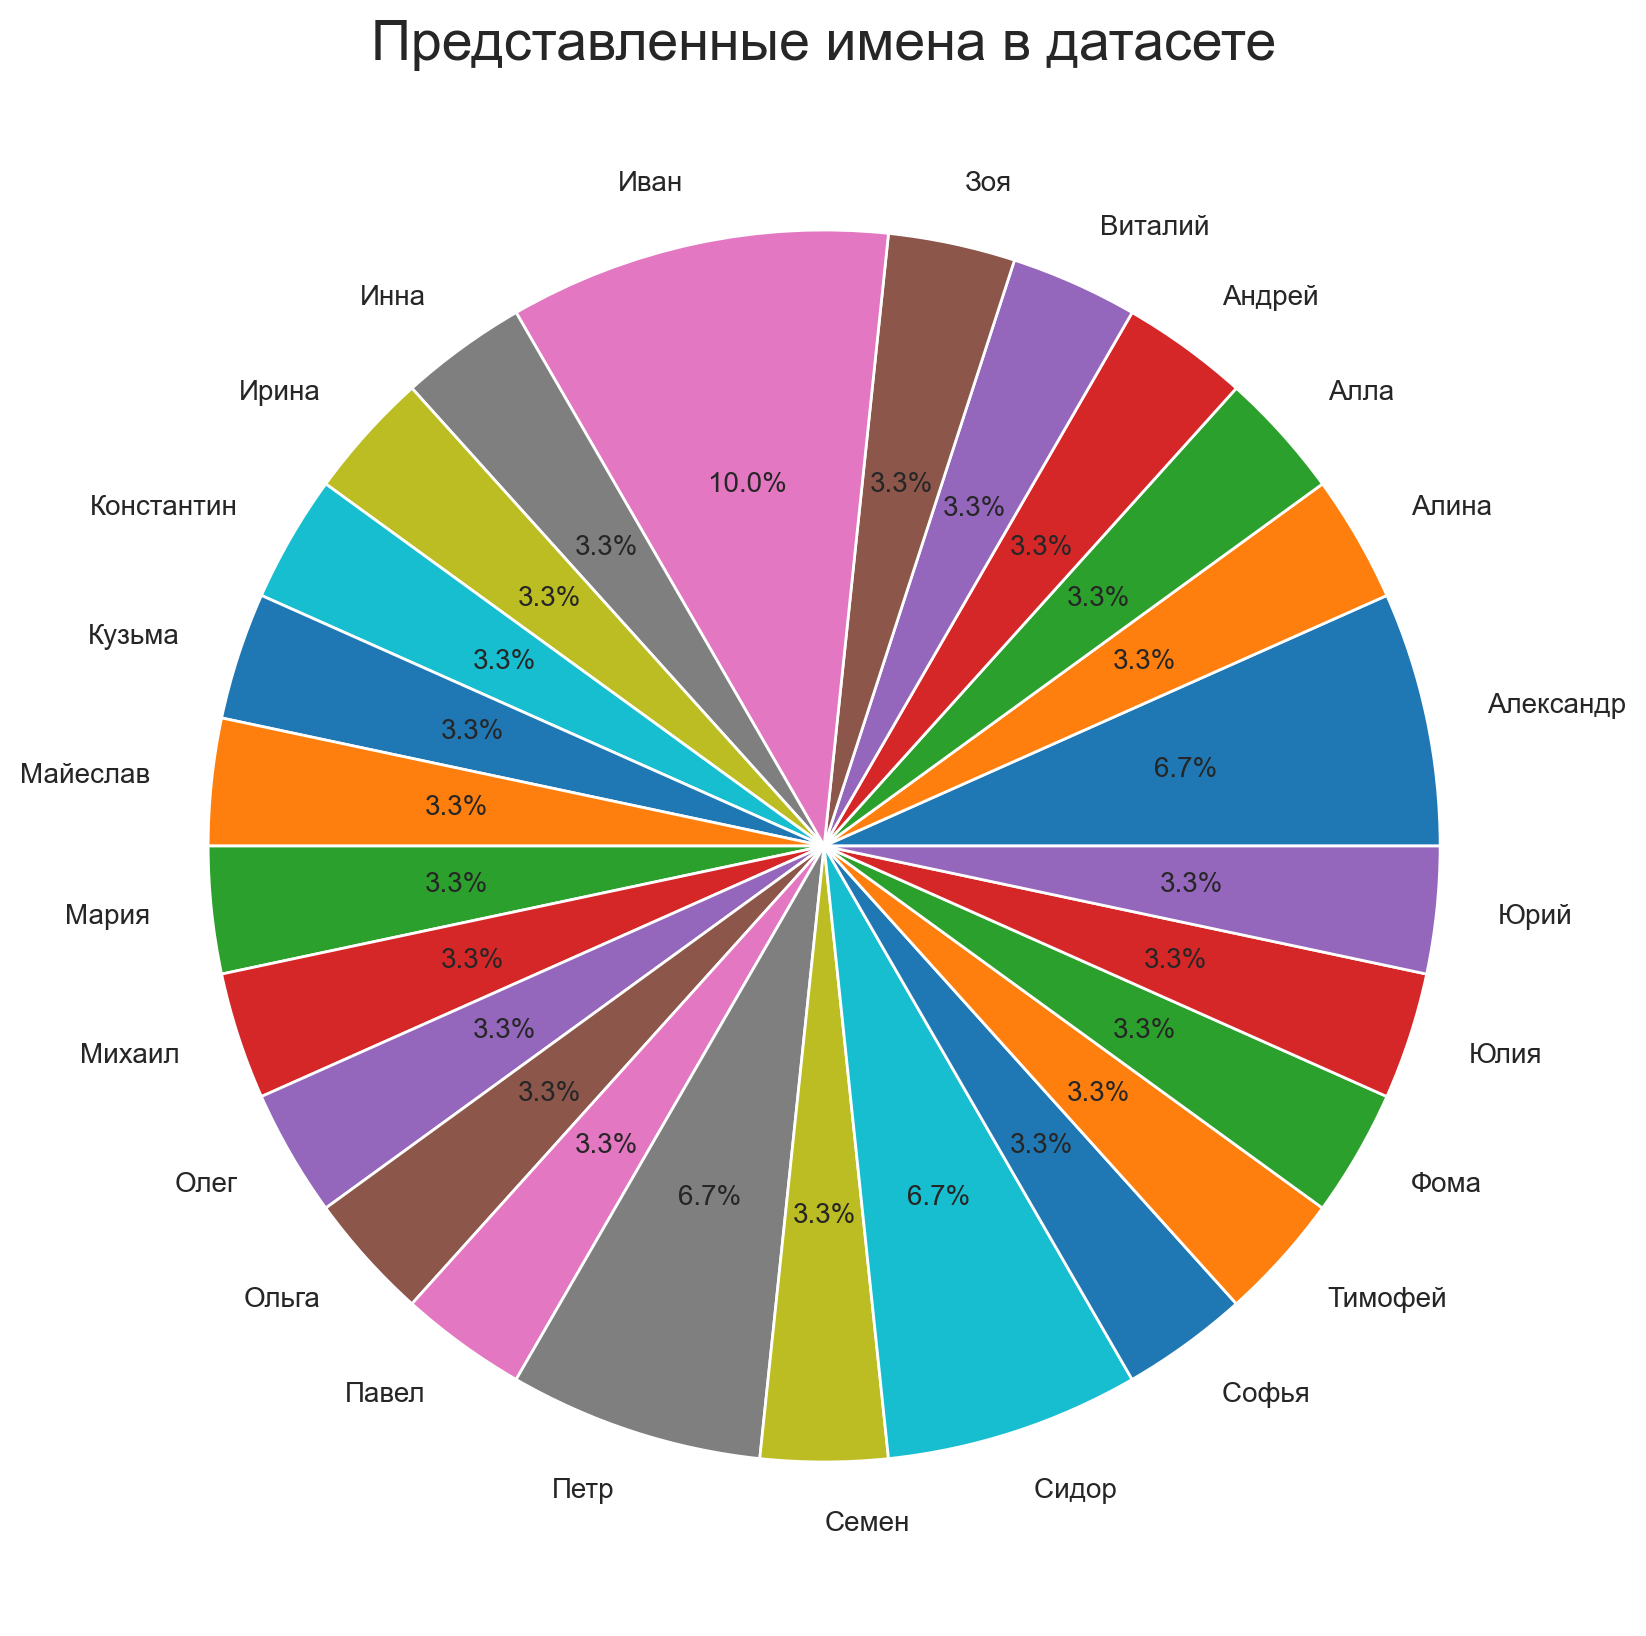

In [15]:
plt.figure(figsize=(12,10),dpi=200)
plt.pie(names_count['№'], labels=names_count['Name'], autopct='%1.1f%%');
plt.title('Представленные имена в датасете', fontsize=20);

**Вопрос: Какие имена выделяются в датасете?** 
<br>
<br>
**Ответ: Иван, Пётр, Сидор, Александр.**
<br>
P.S Я построил такой график, чтобы разнообразить работу, но, возможно, он выглядит плохо.

In [16]:
departments_data = dataset.groupby('Department', as_index=False).count()[['Department', '№']]

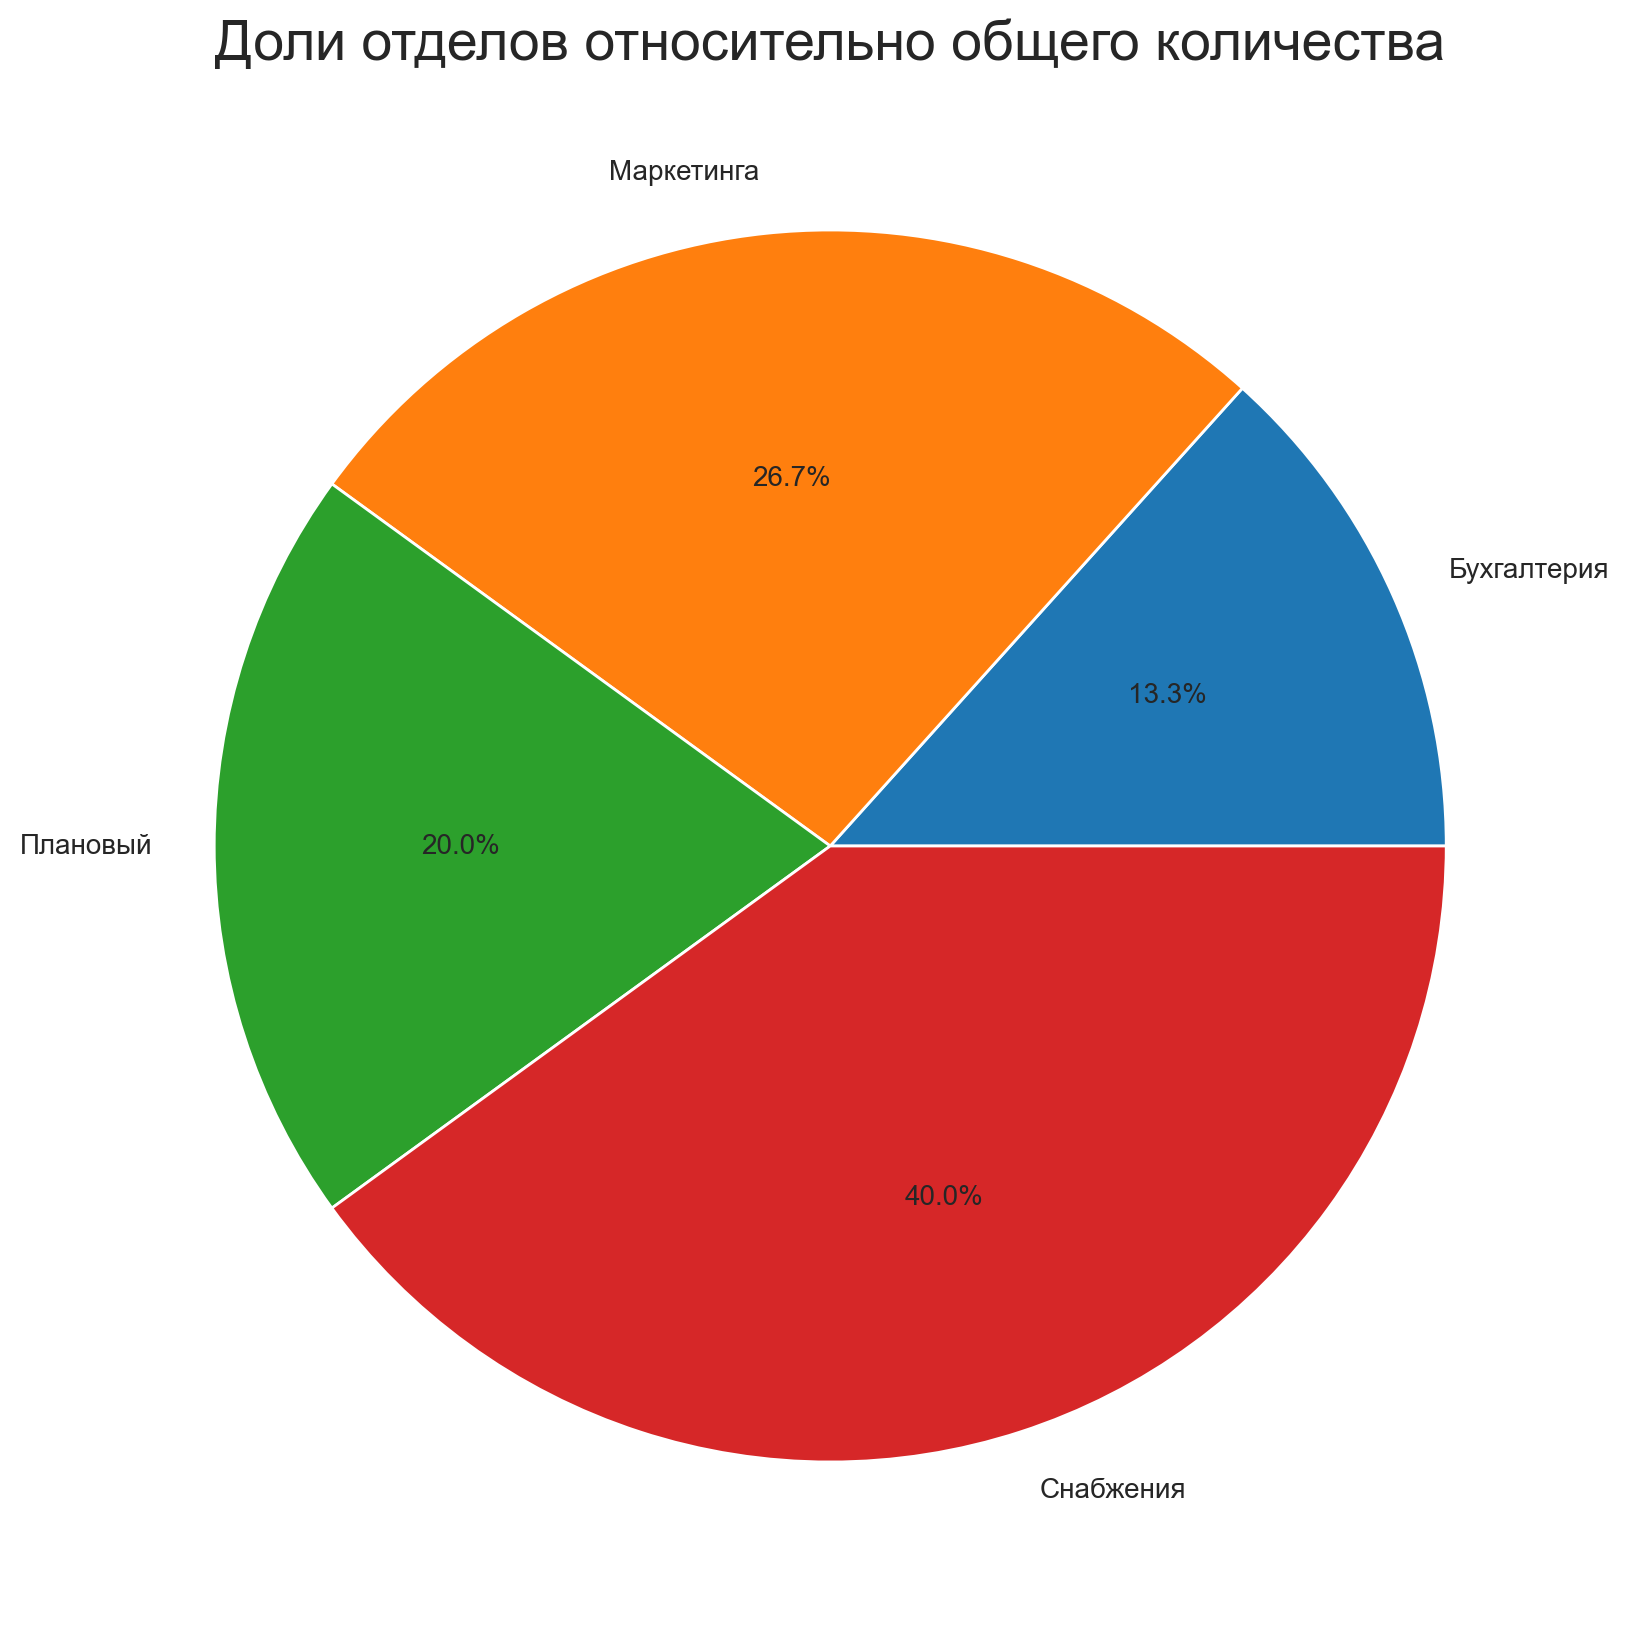

In [17]:
plt.figure(figsize=(12,10),dpi=200)
plt.pie(departments_data['№'], labels=departments_data['Department'], autopct='%1.1f%%');
plt.title('Доли отделов относительно общего количества', fontsize=20);

**Вопрос: Как отделы распределены между собой?** 
<br>
<br>
**Ответ: Снабжения - 40%, Плановый - 20%, Бухгалтерия - 13.3%, Маркетинга - 26.7% .**
<br>
P.S Этот график уже выглядит получше и может соответствовать требованиям.

### .boxplot

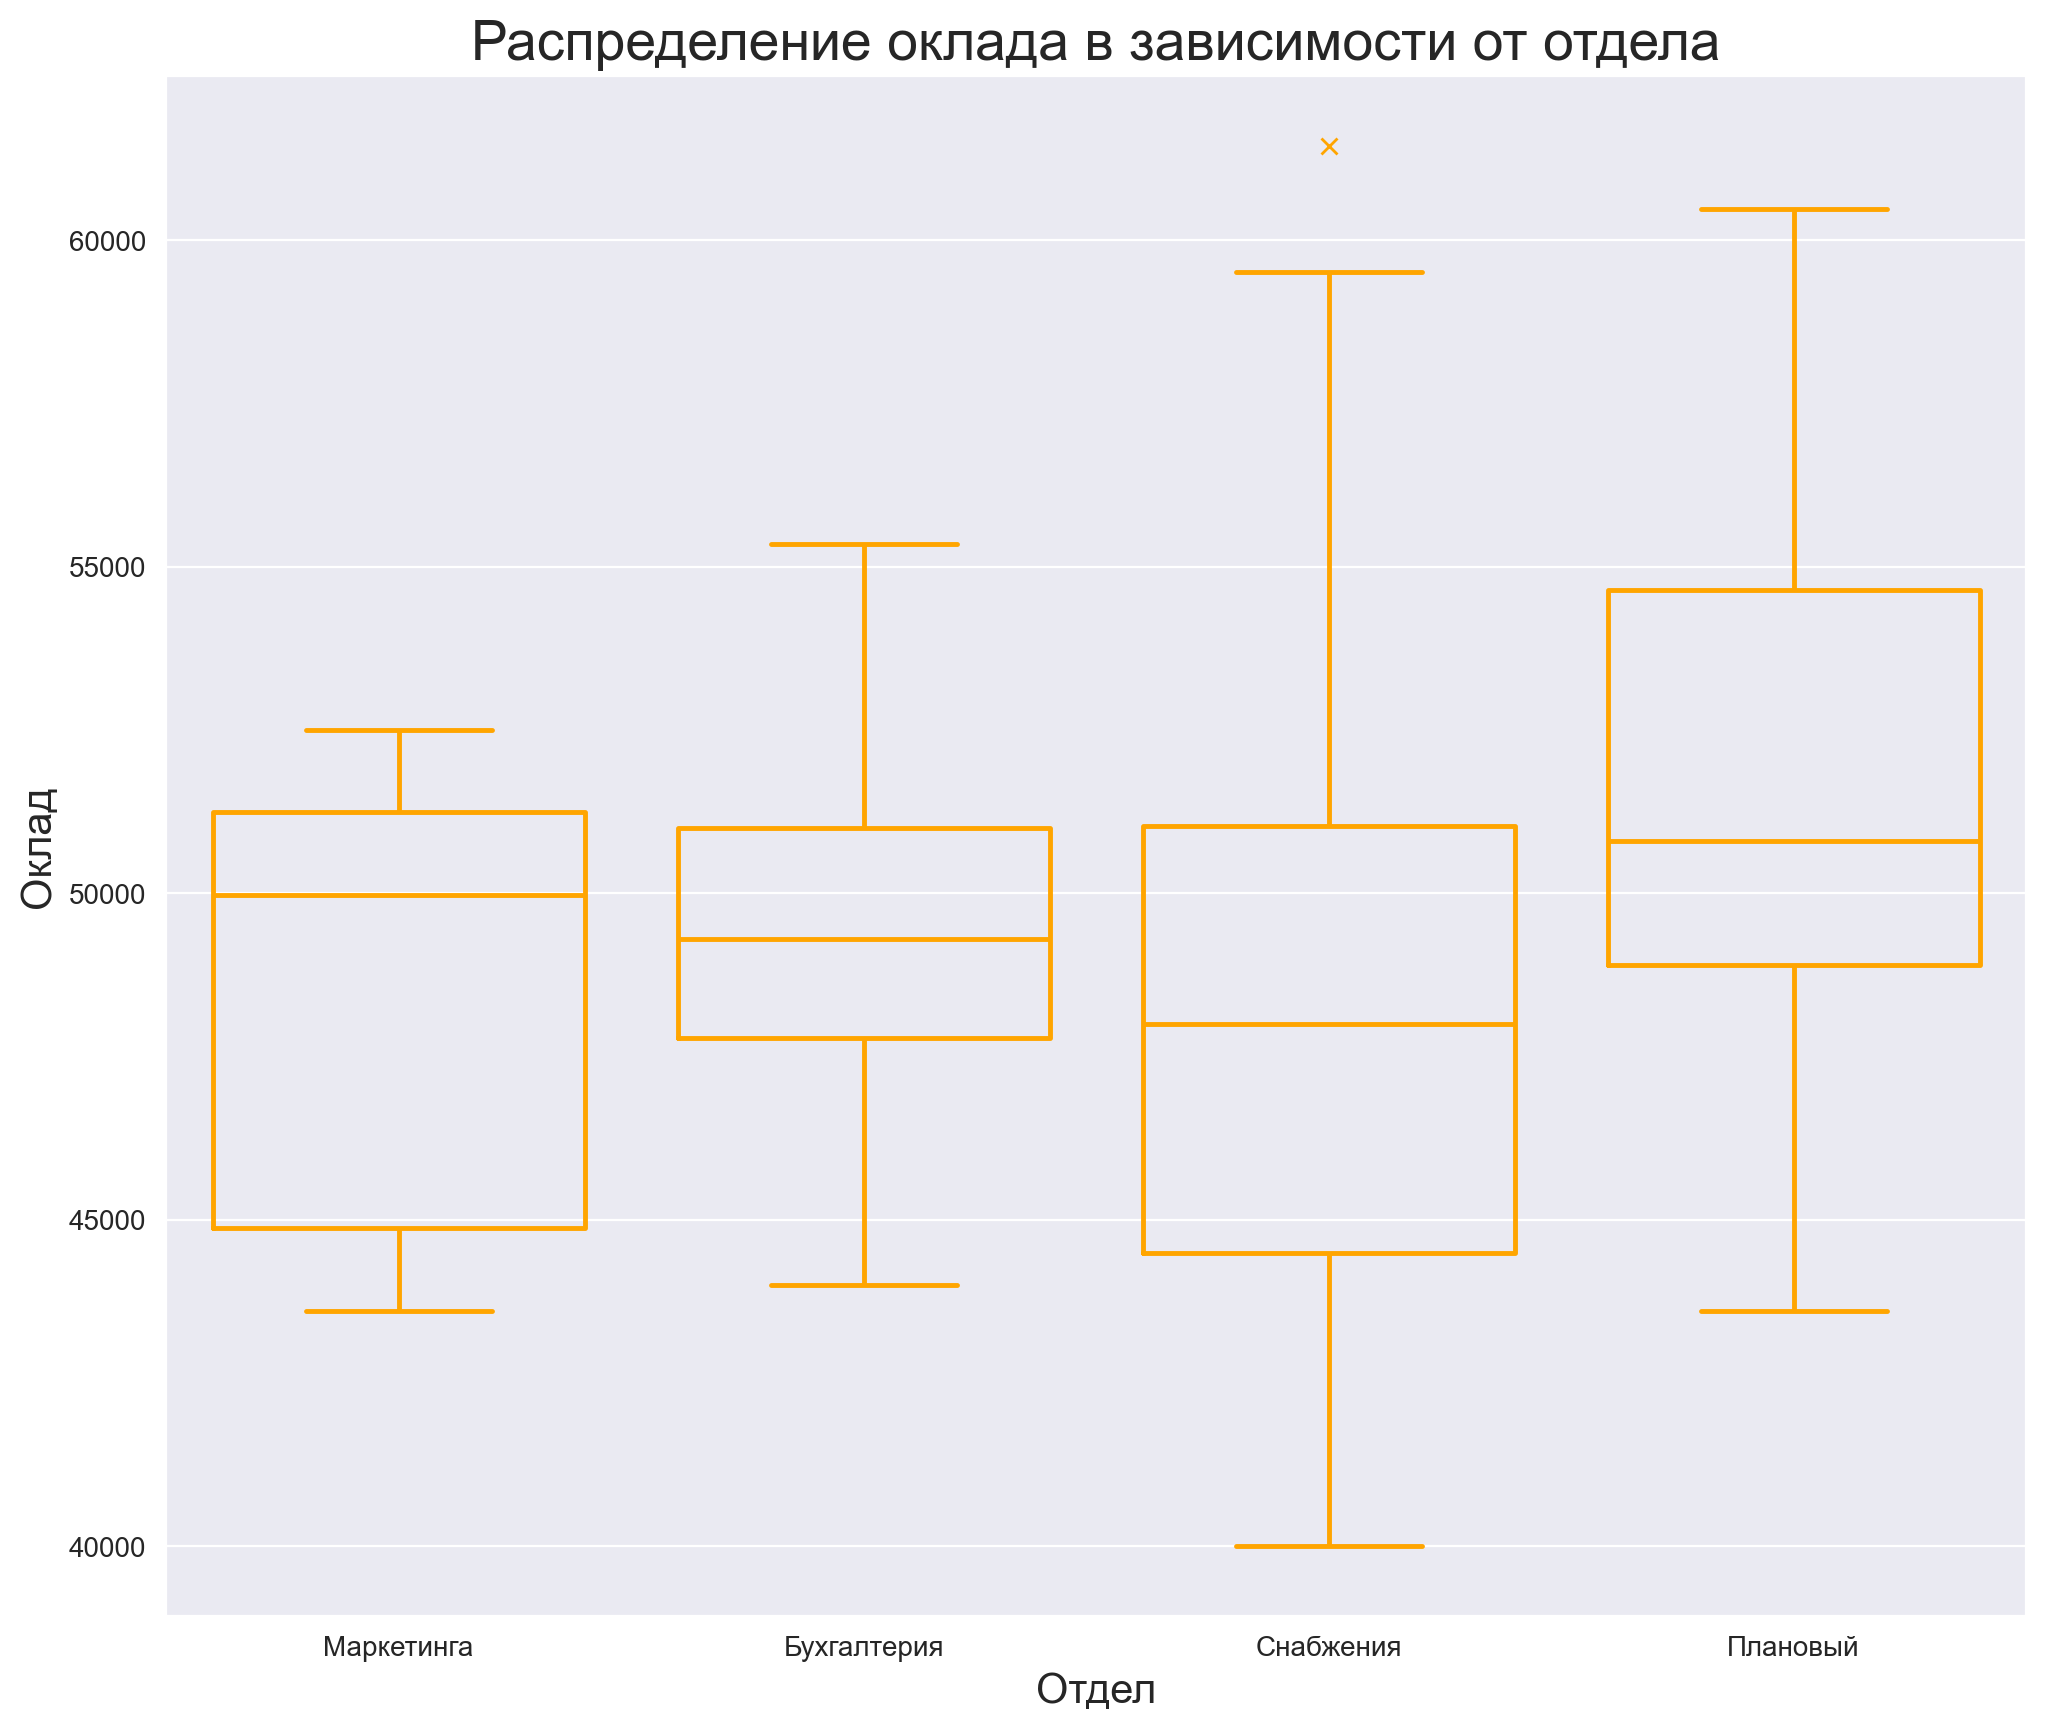

In [18]:
plt.figure(figsize=(12,10),dpi=200)
sns.boxplot(data=dataset, x='Department', y='Salary', fill=False, color='orange', linewidth=1.75,
           flierprops={"marker": "x"})
plt.title('Распределение оклада в зависимости от отдела', fontsize=20)
plt.xlabel('Отдел', fontsize=15)
plt.ylabel('Оклад', fontsize=15);

**Вопрос: Какой отдел имеет самый малый разброс по окладу?** 
<br>
<br>
**Ответ: Отдел маркетинга.**

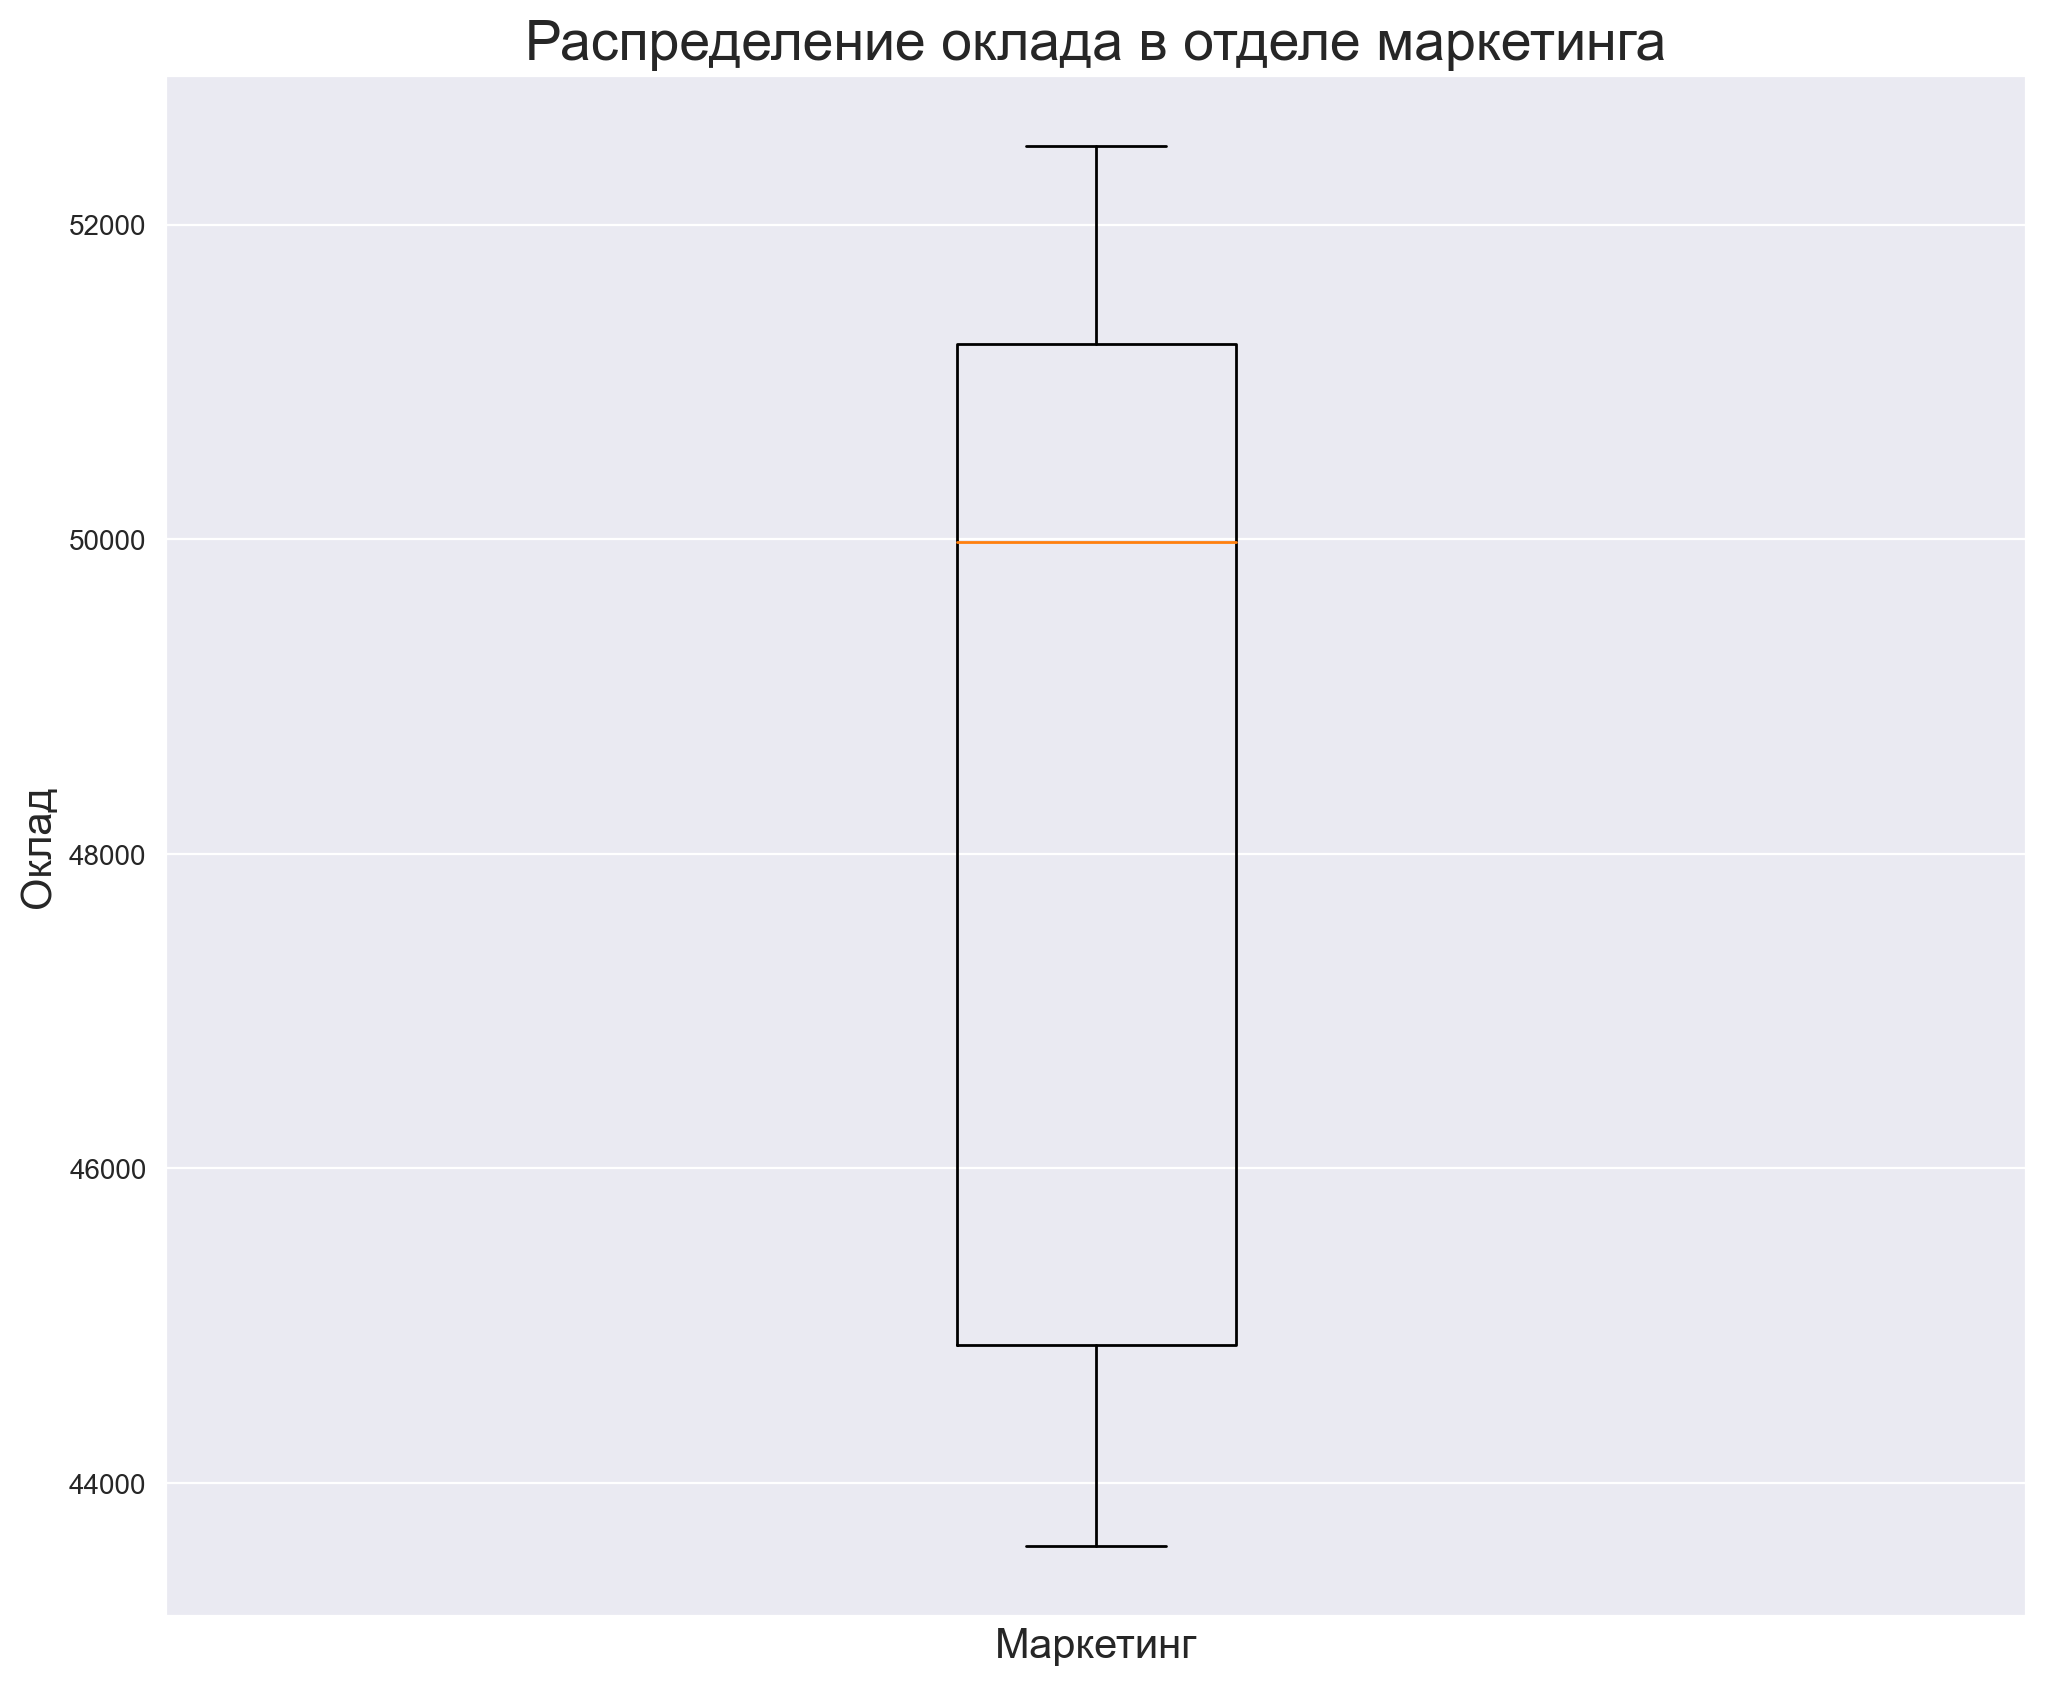

In [19]:
plt.figure(figsize=(12,10),dpi=200)
plt.boxplot(x=dataset[dataset['Department'] == 'Маркетинга']['Salary'])
plt.title('Распределение оклада в отделе маркетинга', fontsize=20)
plt.xlabel('Маркетинг', fontsize=15)
plt.xticks([])
plt.ylabel('Оклад', fontsize=15);

**Вопрос: В каком диапозоне значений находится оклад в отделе маретинга и есть ли там выбросы?** 
<br>
<br>
**Ответ: Выбросов в отделе маркетинга нет, а основная масса значений оклада находится в диапозоне 45000 - 51000 рублей.**

# Свои данные

In [20]:
np.random.seed(1)
my_dataset = pd.read_csv('Employee_Salary_Dataset.csv', delimiter=';')[['ID', 'Experience_Years', 
                                                                        'Age', 'Gender', 'Salary']]
my_dataset.dropna(inplace=True)
my_dataset['Profession'] = np.random.choice(['Аналитик', 'ML-разработчик', 'Фронтендер', 'Бэкендер'],
                                            size=35)

In [21]:
my_dataset['ID'] = my_dataset['ID'].astype('int64')
my_dataset['Experience_Years'] = my_dataset['Experience_Years'].astype('int64')
my_dataset['Age'] = my_dataset['Age'].astype('int64')

In [22]:
my_dataset.head()

,ID,Experience_Years,Age,Gender,Salary,Profession
0,1,5,28,Female,250000.0,ML-разработчик
1,2,1,21,Male,50000.0,Бэкендер
2,3,3,23,Female,170000.0,Аналитик
3,4,2,22,Male,25000.0,Аналитик
4,5,1,17,Male,10000.0,Бэкендер


In [23]:
my_dataset.shape

(35, 6)

In [24]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                35 non-null     int64  
 1   Experience_Years  35 non-null     int64  
 2   Age               35 non-null     int64  
 3   Gender            35 non-null     object 
 4   Salary            35 non-null     float64
 5   Profession        35 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.9+ KB


In [25]:
my_dataset.describe()

,ID,Experience_Years,Age,Salary
count,35.000000,35.00000,35.000000,3.500000e+01
mean,18.000000,9.20000,35.485714,2.059147e+06
std,10.246951,7.55295,14.643552,3.170124e+06
min,1.000000,1.00000,17.000000,3.000000e+03
25%,9.500000,2.50000,22.500000,2.250000e+04
50%,18.000000,6.00000,29.000000,2.500000e+05
75%,26.500000,15.00000,53.500000,3.270000e+06
max,35.000000,27.00000,62.000000,1.000000e+07


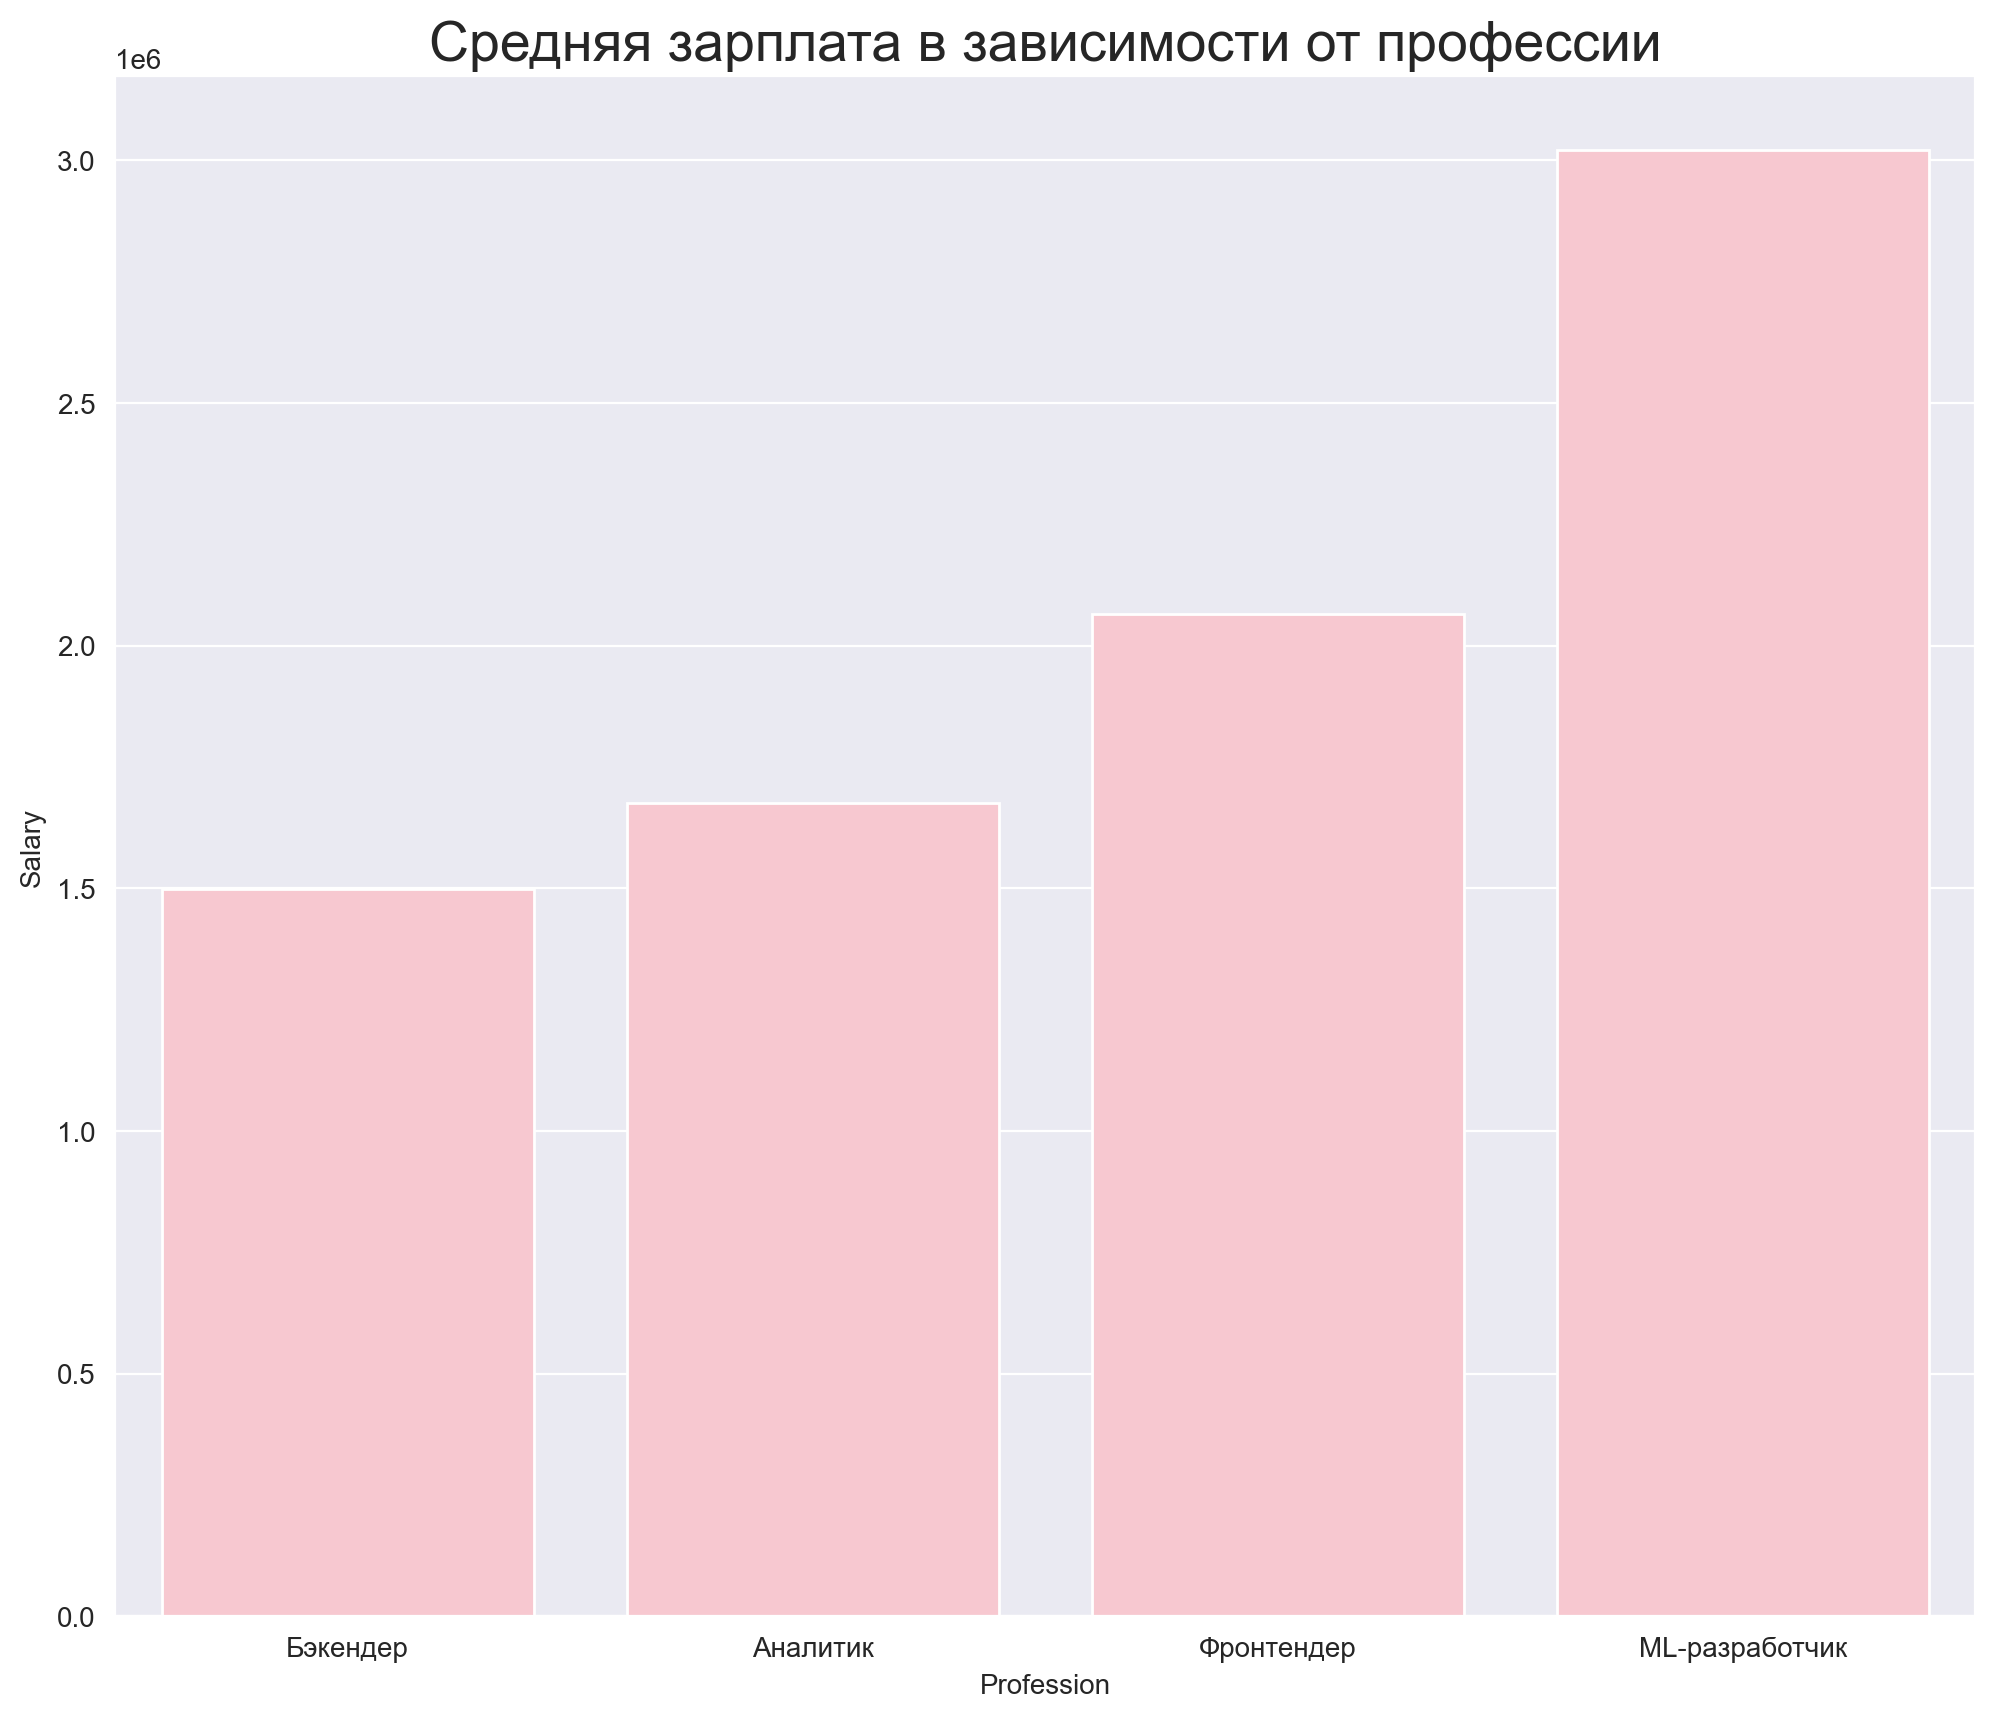

In [26]:
sort_values = my_dataset.groupby('Profession', as_index=False)['Salary'].mean().sort_values(by='Salary')
plt.figure(figsize=(12,10),dpi=200)
sns.barplot(x=sort_values['Profession'], y=sort_values['Salary'], color='pink')
plt.title('Средняя зарплата в зависимости от профессии', fontsize=20);

**Вопрос: Какие профессии более оплачиваемые, а какие нет?** 
<br>
<br>
**Ответ: ML и фронтенд - более оплачиваемые, а аналитика и бэкенд - менее оплачиваемые.**

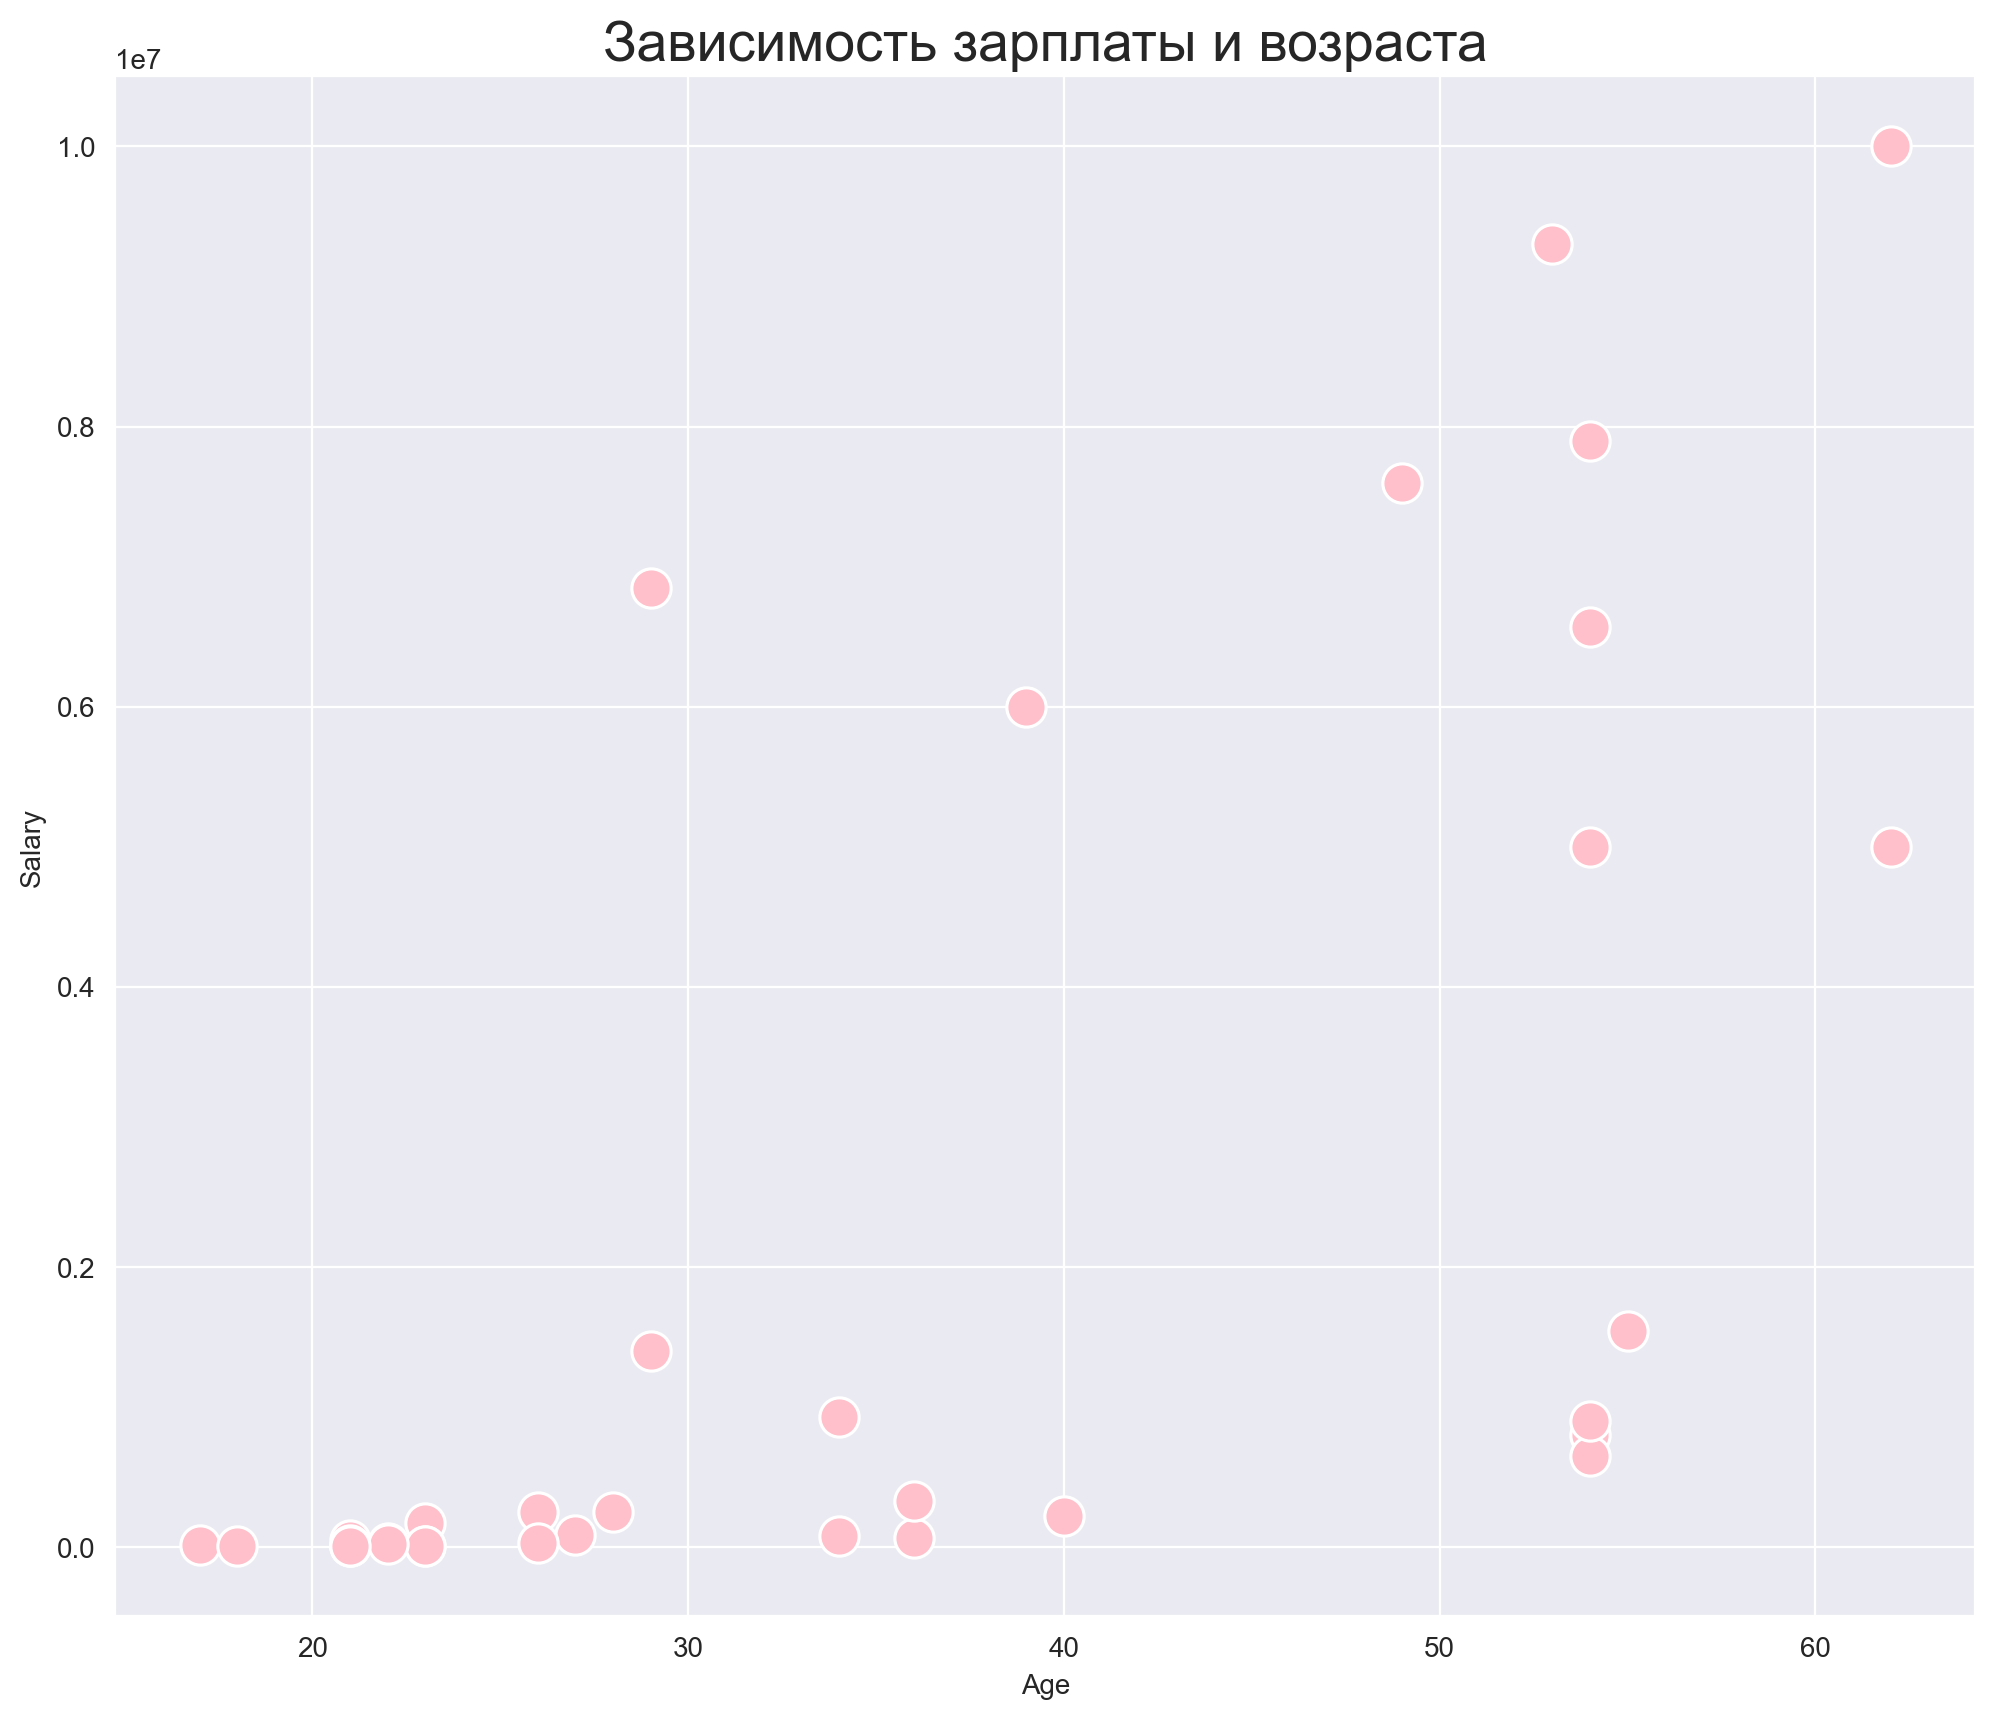

In [27]:
plt.figure(figsize=(12,10),dpi=200)
sns.scatterplot(data=my_dataset, x='Age', y='Salary', marker='o', s=200, color='pink');
plt.title('Зависимость зарплаты и возраста', fontsize=20);

**Вопрос: Как коррелируют между собой зарплата и возраст?** 
<br>
<br>
**Ответ: Корреляция положительная. С ростом возраста, у человка возрастает и зарплата.**

In [28]:
profession_data = my_dataset.groupby('Profession', as_index=False).count()[['Profession', 'ID']]

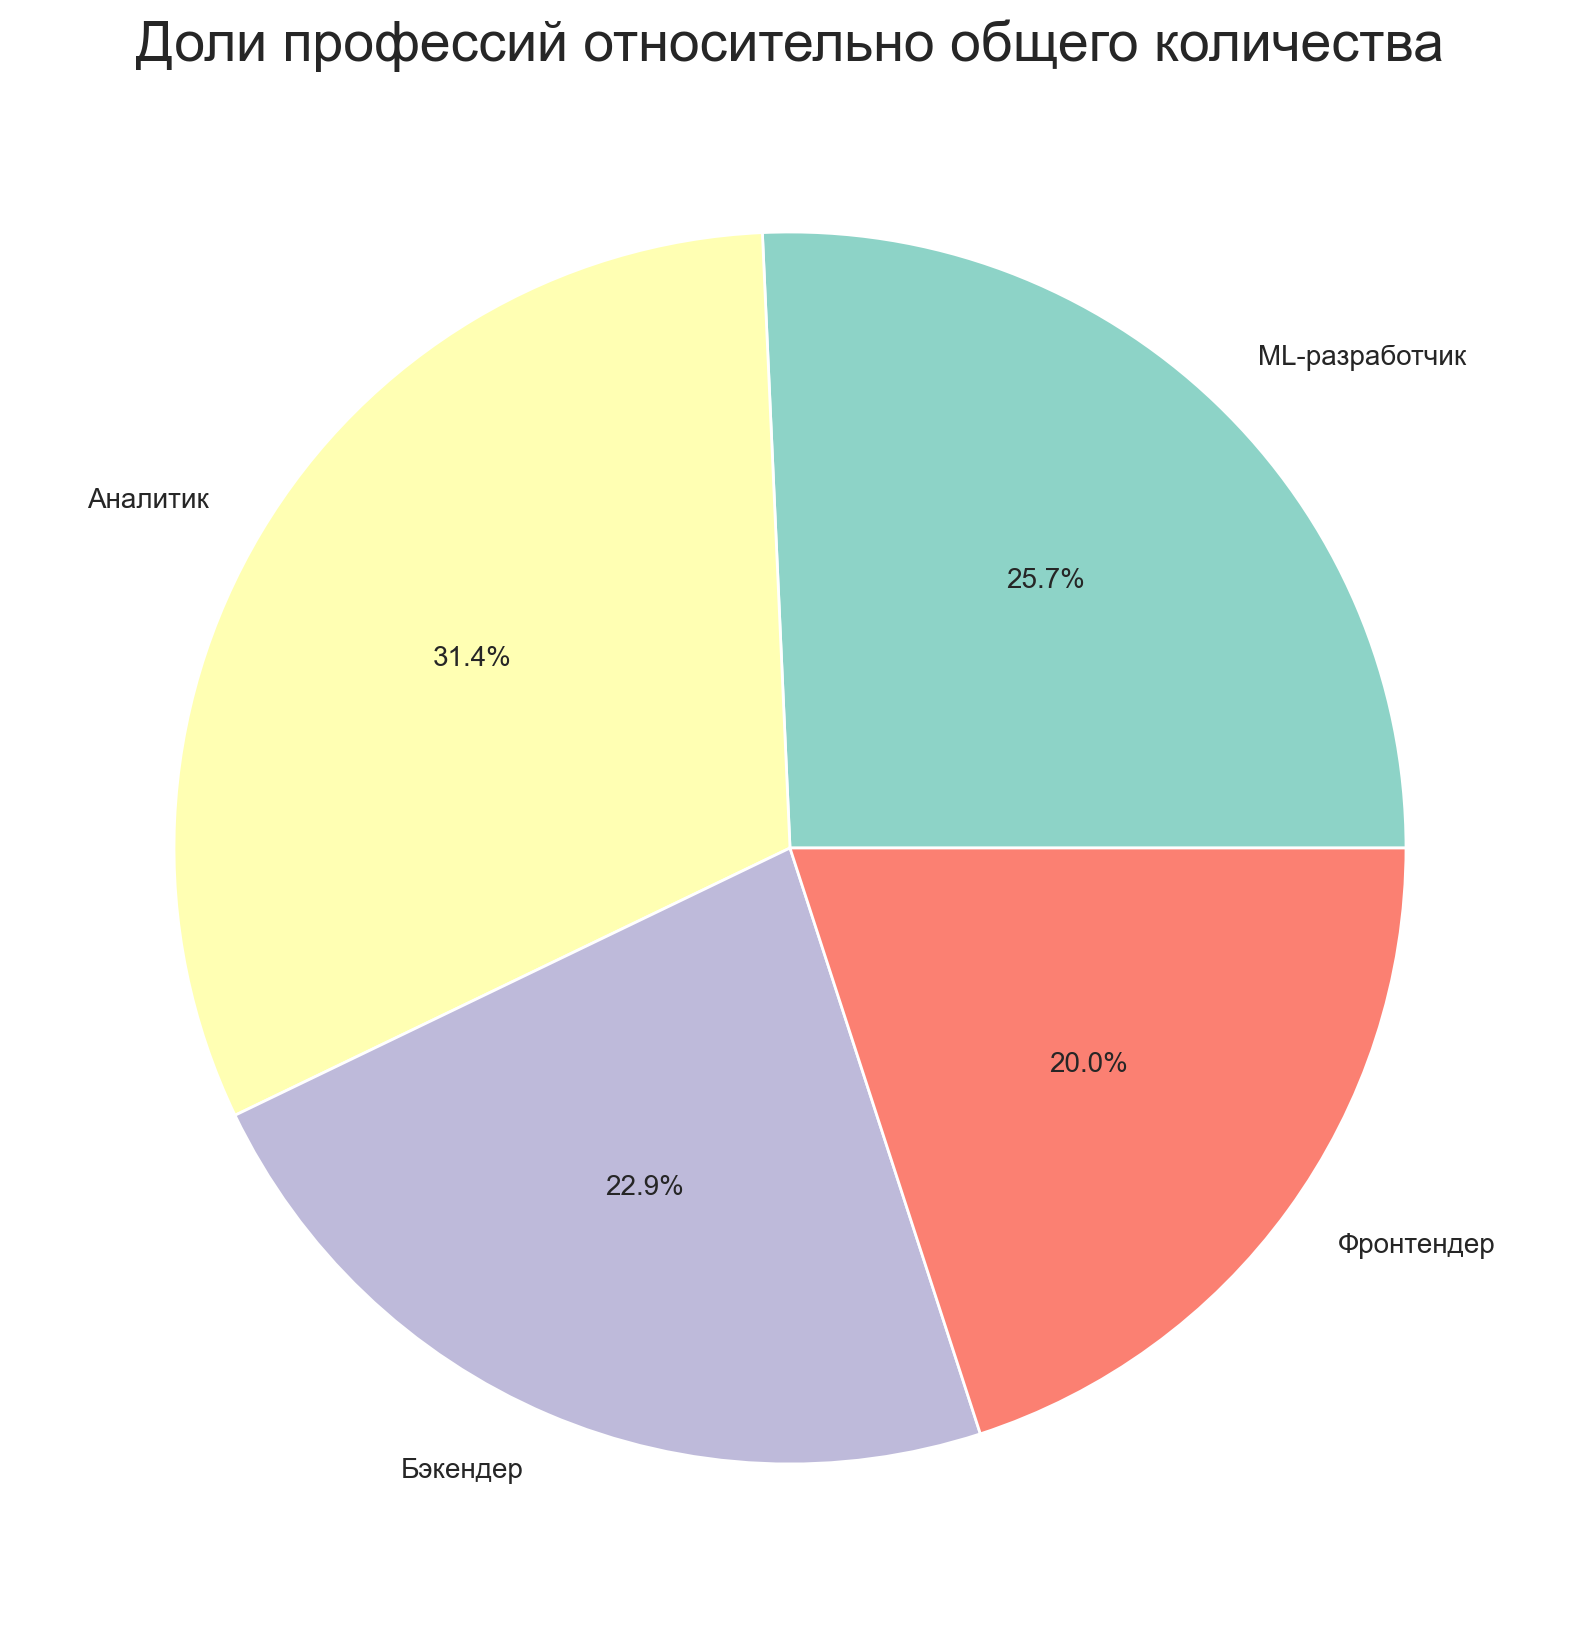

In [29]:
plt.figure(figsize=(12,10),dpi=200)
plt.pie(profession_data['ID'], labels=profession_data['Profession'], autopct='%1.1f%%',
       colors=sns.color_palette('Set3'));
plt.title('Доли профессий относительно общего количества', fontsize=20);

**Вопрос: Каких профессий больше в датасете, а каких меньше?** 
<br>
<br>
**Ответ: Больше всего бэкенда, в остальных случаях поровну распределены аналитика, ML и фронтенд.**